In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#T. Rowe Price Communications & Technology Fund

##Investments as of end of Q2 6-30-2020


In [ ]:
#import packages
import pandas as pd
import numpy as np


orig = pd.read_csv('/content/drive/My Drive/AI/Datasets/Stock_Project/T&C_Fund_Begin - Export.csv')
orig

,Investment,Shares/Par,Value ($),% of Top 10
0,Amazon,"411,600","1,135,530,312",24.23%
1,Facebook,"2,132,800","484,294,896",10.33%
2,"American Tower, REIT","1,840,700","475,894,578",10.15%
3,"Alibaba Group Holding, ADR","2,021,134","435,958,604",9.30%
4,Netflix,"886,480","403,383,859",8.61%
5,"Crown Castle International, REIT","2,364,468","395,693,720",8.44%
6,T-Mobile US,"3,684,370","383,727,136",8.19%
7,PayPal Holdings,"1,900,400","331,106,692",7.06%
8,Alphabet Class C,"227,703","321,883,238",6.87%
9,Tencent Holdings,"4,989,500","319,716,747",6.82%


In [ ]:
import locale
locale.setlocale( locale.LC_ALL, 'en_US.UTF-8' ) 
#locale.atoi('1,000,000')

'en_US.UTF-8'

#Amazon (AMZN)

##Import

In [ ]:

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#read the file
df = pd.read_csv('/content/drive/My Drive/AI/Datasets/Stock_Project/Amazon/AMZN.csv')

#print the head
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-08-06,539.299988,542.739990,527.520020,529.460022,529.460022,3820500
1,2015-08-07,529.159973,529.460022,518.210022,522.619995,522.619995,3969200
2,2015-08-10,528.520020,532.280029,523.000000,524.000000,524.000000,2615900
3,2015-08-11,523.650024,528.979980,522.000000,527.460022,527.460022,2676600
4,2015-08-12,523.750000,527.500000,513.059998,525.909973,525.909973,3962300


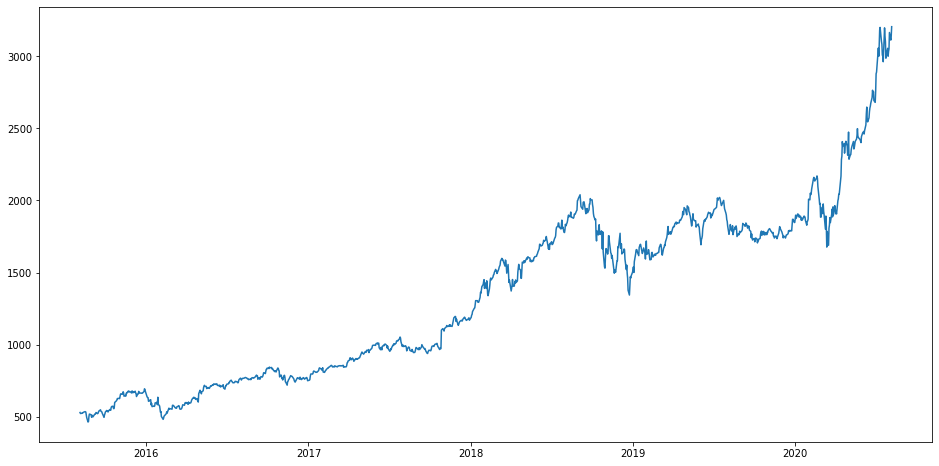

In [ ]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

##Split

In [ ]:
#creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

In [ ]:
# NOTE: I did not use random splitting since that will destroy the time component. 
# Validation starts 7/1/20 the new quarter and the day afetr the reporting
# splitting into train and validation
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#dataset = new_data.values

train = new_data[:1234]
valid = new_data[1234:]

dataset = train.values

valid.head()

,Close
Date,
2020-07-01,2878.7
2020-07-02,2890.3
2020-07-06,3057.04
2020-07-07,3000.12
2020-07-08,3081.11


In [ ]:
train.tail()

,Close
Date,
2020-06-24,2734.4
2020-06-25,2754.58
2020-06-26,2692.87
2020-06-29,2680.38
2020-06-30,2758.82


In [ ]:
valid.tail()

,Close
Date,
2020-07-30,3051.88
2020-07-31,3164.68
2020-08-03,3111.89
2020-08-04,3138.83
2020-08-05,3205.03


In [ ]:
#shapes of the original set
print('\n Shape of the original set:')
print(new_data.shape)

# shapes of training set
print('\n Shape of training set:')
print(train.shape)

# shapes of validation set
print('\n Shape of validation set:')
print(valid.shape)


 Shape of the original set:
(1259, 1)

 Shape of training set:
(1234, 1)

 Shape of validation set:
(25, 1)


##LSTM

In [ ]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM


In [ ]:

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [ ]:
x_train.shape

(1174, 60, 1)

In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
s=X_test.shape
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

1174/1174 - 24s - loss: 0.0019


In [ ]:
inputs.shape

(85, 1)

In [ ]:
s

(25, 60, 1)

##Plotting

Plotting: 
- Closing Price Years 1-4 (Training) (Blue)
- Closing Price Year 5 Actual (Current Year) (Orange)
- Closing Price Year 5 Prediction (Current Year) (Green)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


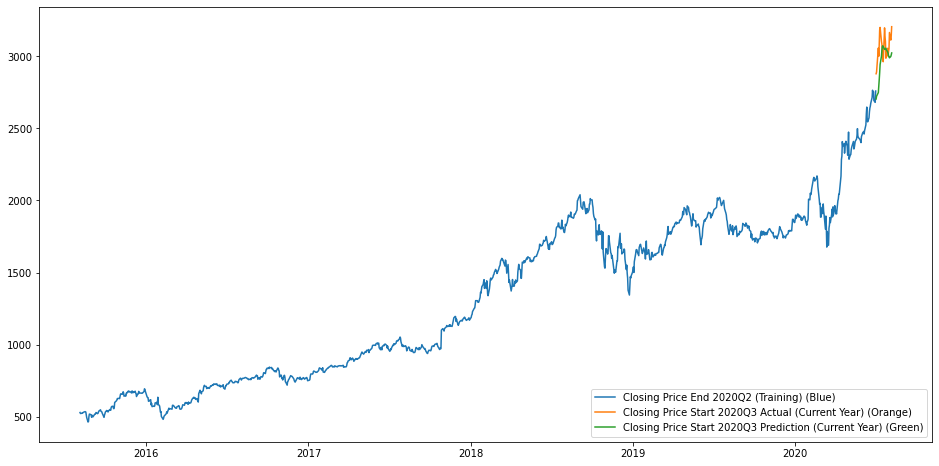

In [ ]:

valid['Predictions'] = closing_price

import matplotlib.patches as mpatches

plt.figure(figsize=(16,8))

#blue_patch = mpatches.Patch(color='blue', label='Closing Price Years 1-4 (Training) (Blue)')
#orange_patch = mpatches.Patch(color='orange', label='Closing Price Year 5 Actual (Current Year) (Orange)')
#green_patch = mpatches.Patch(color='green', label='Closing Price Year 5 Prediction (Current Year) (Green)')
#plt.legend(handles=[blue_patch,orange_patch,green_patch])

line1 = plt.plot(train['Close'],label='Closing Price End 2020Q2 (Training) (Blue)')
line2 = plt.plot(valid[['Close']],label='Closing Price Start 2020Q3 Actual (Current Year) (Orange)')
line3 = plt.plot(valid['Predictions'],label='Closing Price Start 2020Q3 Prediction (Current Year) (Green)')

plt.legend( loc='lower right')

plt.show()


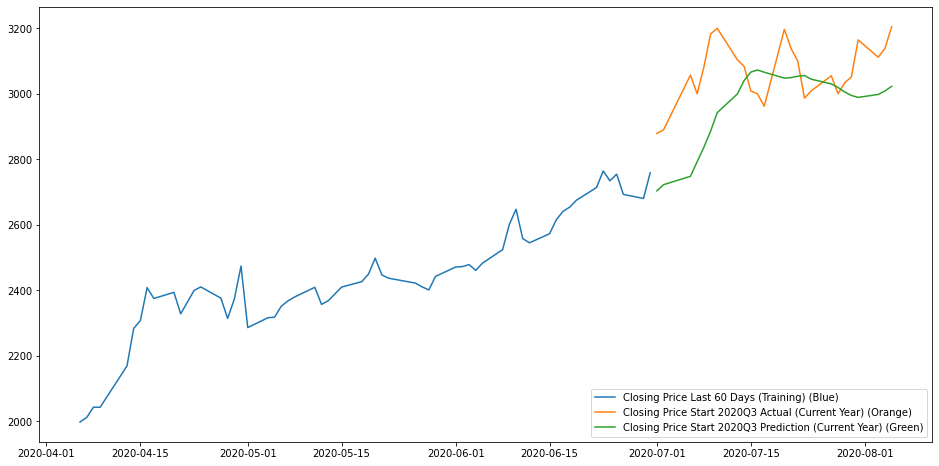

In [ ]:
show = train[-60:]


plt.figure(figsize=(16,8))

line1 = plt.plot(show['Close'],label='Closing Price Last 60 Days (Training) (Blue)')
line2 = plt.plot(valid[['Close']],label='Closing Price Start 2020Q3 Actual (Current Year) (Orange)')
line3 = plt.plot(valid['Predictions'],label='Closing Price Start 2020Q3 Prediction (Current Year) (Green)')

plt.legend( loc='lower right')

plt.show()

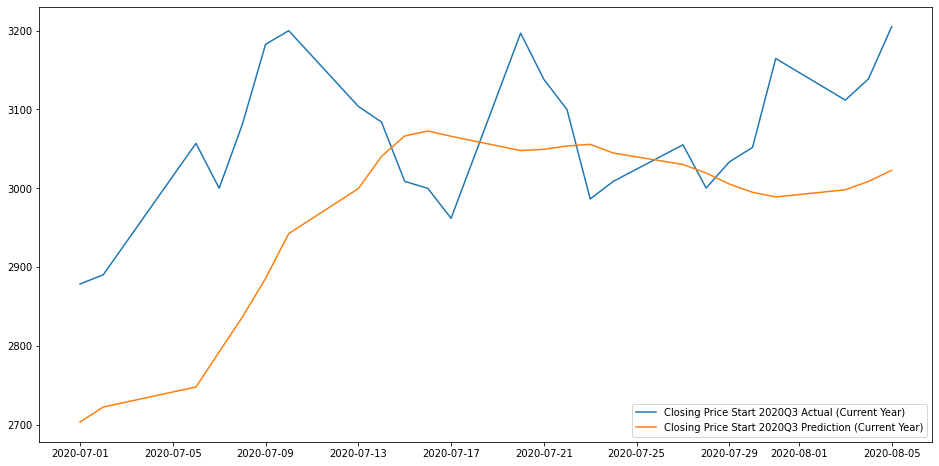

In [ ]:
plt.figure(figsize=(16,8))


line2 = plt.plot(valid[['Close']],label='Closing Price Start 2020Q3 Actual (Current Year)')
line3 = plt.plot(valid['Predictions'],label='Closing Price Start 2020Q3 Prediction (Current Year)')

plt.legend( loc='lower right')

plt.show()

##Predictions

In [ ]:
#Where is the highest closing price in the predicted zone
valid[['Predictions']].max()

Predictions    3072.701416
dtype: float32

In [ ]:
#date of highest prediction
valid[['Predictions']].idxmax()

Predictions   2020-07-16
dtype: datetime64[ns]

In [ ]:
#valid.tail()

In [ ]:
valid.to_csv('/content/drive/My Drive/AI/Datasets/Stock_Project/Predictions/prediction_AMZN.csv')

In [ ]:
#date +/- week 
#valid_sub = valid.loc['2020-07-27':'2020-08-05']
#valid_sub

In [ ]:
print(valid.loc['2020-07-01'])

Close           2878.7
Predictions    2703.58
Name: 2020-07-01 00:00:00, dtype: object


In [ ]:
print(valid[valid.index=='2020-07-01'])

             Close  Predictions
Date                           
2020-07-01  2878.7  2703.578125


In [ ]:
print(valid[valid.Predictions == valid.Predictions.max()]) 

             Close  Predictions
Date                           
2020-07-16  2999.9  3072.701416


In [ ]:
res = valid[['Predictions']]
res.columns = ['Value']
res = res.sort_values(by='Value', ascending=False)
res = res[:1]

res2 = train
res2.columns = ['Value']
res2 = res2[-1:]

#res.head()
#res2.head()
result = res2.append(res)
result

,Value
Date,
2020-06-30,2758.82
2020-07-16,3072.7


In [ ]:
selldate = str(valid[['Predictions']].idxmax()[0])

In [ ]:
###############
plres0 = valid[['Predictions']]
plres0 = plres0.loc[:selldate]
plres0.columns =  ['AMZN']
plres0.tail()

,AMZN
Date,
2020-07-10,2942.617432
2020-07-13,2999.584961
2020-07-14,3040.507080
2020-07-15,3066.432129
2020-07-16,3072.701416


In [ ]:
bvalue = result['Value'][0]

In [ ]:
#############
roil = []
for index, row in plres0.iterrows():
     roil.append( ((row['AMZN']-	bvalue)/bvalue)*100)



In [ ]:
plres0['AMZN_ROI (%)'] = roil

In [ ]:
plres0.tail()

,AMZN,AMZN_ROI (%)
Date,,
2020-07-10,2942.617432,6.662173
2020-07-13,2999.584961,8.727097
2020-07-14,3040.507080,10.210416
2020-07-15,3066.432129,11.150131
2020-07-16,3072.701416,11.377377


In [ ]:
plres0.to_csv('/content/drive/My Drive/AI/Datasets/Stock_Project/Predictions/sell_AMZN.csv')

##End Valuation

In [ ]:
orig.loc[0]

Investment            Amazon
Shares/Par           411,600
Value ($)      1,135,530,312
% of Top 10           24.23%
Name: 0, dtype: object

In [ ]:
bdate = str(result.index[0]) 
bdate = bdate.split(' ')
bdate = bdate[0]
bdate

'2020-06-30'

In [ ]:
sdate = str(result.index[1]) 
sdate = sdate.split(' ')
sdate = sdate[0]
sdate

'2020-07-16'

In [ ]:
ahigh = valid[['Close']]
ahigh = ahigh.sort_values(by='Close', ascending=False)
ahigh = ahigh[:1]
#ahigh

evalue = ahigh['Close'][0]
pp = round(evalue-bvalue,2)
ro = pp/bvalue
rop = ro*100
rop = round(rop,2)
rop

16.17

In [ ]:

bsvalue = round(result.Value[0],2)

esvalue = round(result.Value[1],2)
pps = round(esvalue-bsvalue,2)
roi = pps/bsvalue
roip = roi*100
roip =round(roip,2)



print('Begin Date: '+str(bdate))
print('Begin Value/Share: '+str(bsvalue))
print('Sell Date: '+str(sdate))
print('Sell Value/Share: '+str(esvalue))
print('Profit per Share: '+str(pps))
print('Return on Investment: '+str(roip)+'%')
print('\n')

###############
shares = locale.atoi(orig.loc[0]['Shares/Par'])
bvalue = locale.atoi(orig.loc[0]['Value ($)'])
svalue = round(shares * esvalue,2)
profit = round(svalue - bvalue,2)
print('Shares: '+str(shares))
print('Begin Value: '+str(bvalue))
print('Sell Value: '+str(svalue))
print('Total Profit: '+str(profit))
print('\n')

print('Actual Max Return on Investment: '+str(rop)+'%')


Begin Date: 2020-06-30
Begin Value/Share: 2758.82
Sell Date: 2020-07-16
Sell Value/Share: 3072.7
Profit per Share: 313.88
Return on Investment: 11.38%


Shares: 411600
Begin Value: 1135530312
Sell Value: 1264723320.0
Total Profit: 129193008.0


Actual Max Return on Investment: 16.17%


In [ ]:
final = pd.DataFrame(orig)

In [ ]:
header_list = ['Investment','Shares','Begin Date','Begin Share Value','Sell Date','Sell Share Value',
               'Profit Per Share','Begin Value','Sell Value','Total Profit','ROI (%)', 'Actual Max ROI (%)']


final = final.reindex(columns = header_list)


##Update Final Table

In [ ]:
final['Shares'].loc[0] = shares
final['Begin Date'].loc[0] = bdate
final['Begin Share Value'].loc[0] = bsvalue
final['Sell Date'].loc[0] = sdate
final['Sell Share Value'].loc[0] = esvalue
final['Profit Per Share'].loc[0] = pps
final['Begin Value'].loc[0] = bvalue
final['Sell Value'].loc[0] = svalue
final['Total Profit'].loc[0] = profit
final['ROI (%)'].loc[0] = roip
final['Actual Max ROI (%)'].loc[0] = rop

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
final

,Investment,Shares,Begin Date,Begin Share Value,Sell Date,Sell Share Value,Profit Per Share,Begin Value,Sell Value,Total Profit,ROI (%),Actual Max ROI (%)
0,Amazon,411600.0,2020-06-30,2758.82,2020-07-16,3072.7,313.88,1.135530e+09,1.264723e+09,129193008.0,11.38,16.17
1,Facebook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"American Tower, REIT",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Alibaba Group Holding, ADR",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Netflix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"Crown Castle International, REIT",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,T-Mobile US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,PayPal Holdings,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Alphabet Class C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Tencent Holdings,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Facebook (FB)

##Import

In [ ]:

#read the file
df = pd.read_csv('/content/drive/My Drive/AI/Datasets/Stock_Project/Facebook/FB.csv')

#print the head
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-08-06,97.180000,98.739998,94.419998,95.120003,95.120003,42271300
1,2015-08-07,95.379997,95.400002,93.610001,94.300003,94.300003,23199100
2,2015-08-10,95.680000,95.900002,93.629997,94.150002,94.150002,21624200
3,2015-08-11,93.730003,94.760002,92.900002,93.620003,93.620003,22491000
4,2015-08-12,92.699997,94.440002,91.190002,94.190002,94.190002,27050500


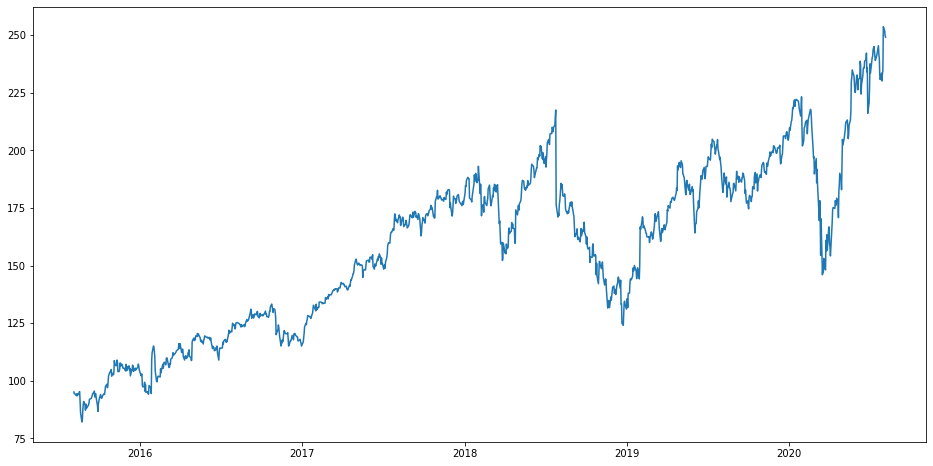

In [ ]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

##Split

In [ ]:
#creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

In [ ]:
# NOTE: I did not use random splitting since that will destroy the time component. 
# Validation starts 7/1/20 the new quarter and the day afetr the reporting
# splitting into train and validation
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#dataset = new_data.values

train = new_data[:1234]
valid = new_data[1234:]

dataset = train.values

valid.head()

,Close
Date,
2020-07-01,237.55
2020-07-02,233.42
2020-07-06,240.28
2020-07-07,240.86
2020-07-08,243.58


In [ ]:
train.tail()

,Close
Date,
2020-06-24,234.02
2020-06-25,235.68
2020-06-26,216.08
2020-06-29,220.64
2020-06-30,227.07


In [ ]:
valid.tail()

,Close
Date,
2020-07-30,234.5
2020-07-31,253.67
2020-08-03,251.96
2020-08-04,249.83
2020-08-05,249.12


In [ ]:
#shapes of the original set
print('\n Shape of the original set:')
print(new_data.shape)

# shapes of training set
print('\n Shape of training set:')
print(train.shape)

# shapes of validation set
print('\n Shape of validation set:')
print(valid.shape)


 Shape of the original set:
(1259, 1)

 Shape of training set:
(1234, 1)

 Shape of validation set:
(25, 1)


##LSTM

In [ ]:

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [ ]:
x_train.shape

(1174, 60, 1)

In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
s=X_test.shape
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

1174/1174 - 24s - loss: 0.0031


In [ ]:
inputs.shape

(85, 1)

In [ ]:
s

(25, 60, 1)

##Plotting

Plotting: 
- Closing Price Years 1-4 (Training) (Blue)
- Closing Price Year 5 Actual (Current Year) (Orange)
- Closing Price Year 5 Prediction (Current Year) (Green)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


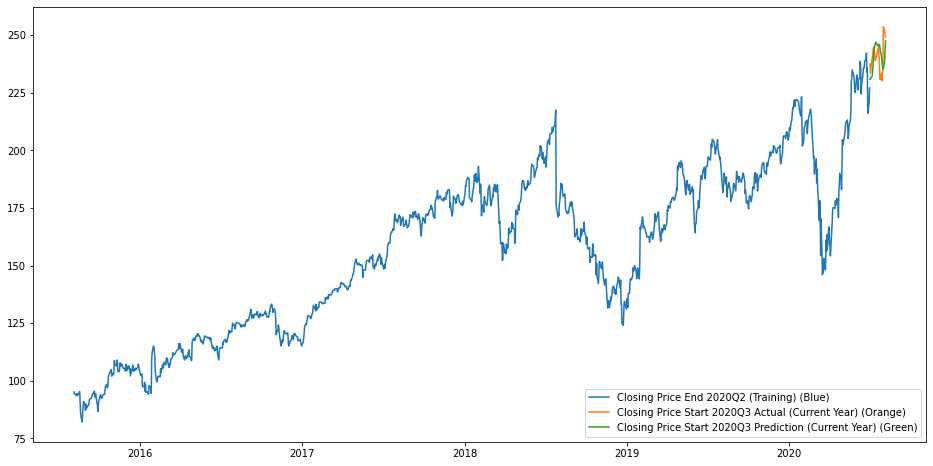

In [ ]:

valid['Predictions'] = closing_price

import matplotlib.patches as mpatches

plt.figure(figsize=(16,8))

#blue_patch = mpatches.Patch(color='blue', label='Closing Price Years 1-4 (Training) (Blue)')
#orange_patch = mpatches.Patch(color='orange', label='Closing Price Year 5 Actual (Current Year) (Orange)')
#green_patch = mpatches.Patch(color='green', label='Closing Price Year 5 Prediction (Current Year) (Green)')
#plt.legend(handles=[blue_patch,orange_patch,green_patch])

line1 = plt.plot(train['Close'],label='Closing Price End 2020Q2 (Training) (Blue)')
line2 = plt.plot(valid[['Close']],label='Closing Price Start 2020Q3 Actual (Current Year) (Orange)')
line3 = plt.plot(valid['Predictions'],label='Closing Price Start 2020Q3 Prediction (Current Year) (Green)')

plt.legend( loc='lower right')

plt.show()


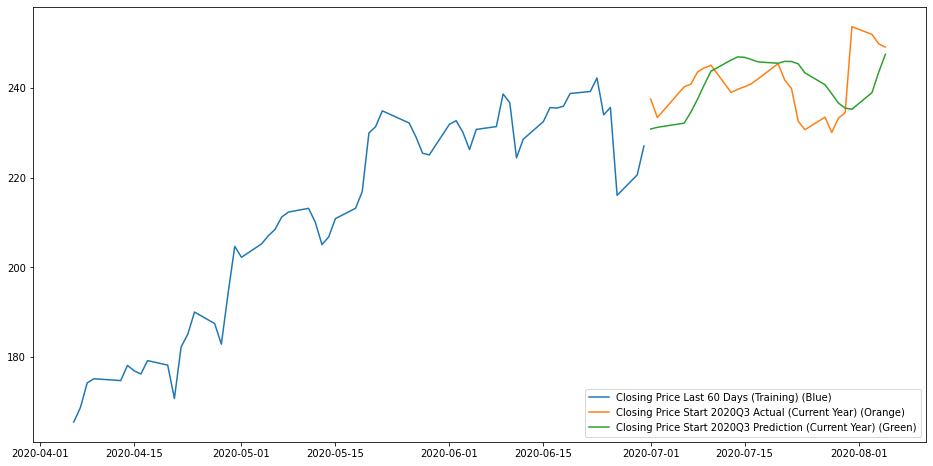

In [ ]:
show = train[-60:]


plt.figure(figsize=(16,8))

line1 = plt.plot(show['Close'],label='Closing Price Last 60 Days (Training) (Blue)')
line2 = plt.plot(valid[['Close']],label='Closing Price Start 2020Q3 Actual (Current Year) (Orange)')
line3 = plt.plot(valid['Predictions'],label='Closing Price Start 2020Q3 Prediction (Current Year) (Green)')

plt.legend( loc='lower right')

plt.show()

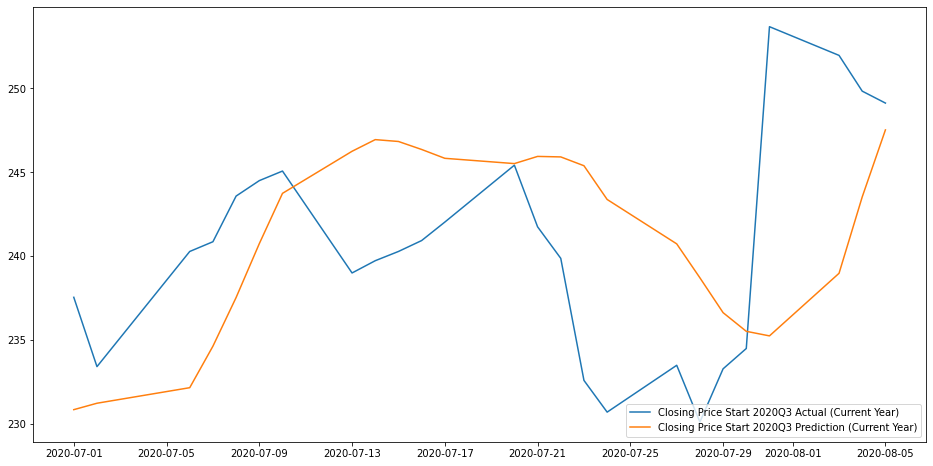

In [ ]:
plt.figure(figsize=(16,8))


line2 = plt.plot(valid[['Close']],label='Closing Price Start 2020Q3 Actual (Current Year)')
line3 = plt.plot(valid['Predictions'],label='Closing Price Start 2020Q3 Prediction (Current Year)')

plt.legend( loc='lower right')

plt.show()

##Predictions

In [ ]:
#Where is the highest closing price in the predicted zone
valid[['Predictions']].max()

Predictions    247.520889
dtype: float32

In [ ]:
#date of highest prediction
valid[['Predictions']].idxmax()

Predictions   2020-08-05
dtype: datetime64[ns]

In [ ]:
#valid.tail()

In [ ]:
#########
valid.to_csv('/content/drive/My Drive/AI/Datasets/Stock_Project/Predictions/prediction_FB.csv')

In [ ]:
#date +/- week 
#valid_sub = valid.loc['2020-07-27':'2020-08-05']
#valid_sub

In [ ]:
print(valid.loc['2020-07-01'])

Close           237.55
Predictions    230.857
Name: 2020-07-01 00:00:00, dtype: object


In [ ]:
print(valid[valid.index=='2020-07-01'])

             Close  Predictions
Date                           
2020-07-01  237.55   230.856979


In [ ]:
print(valid[valid.Predictions == valid.Predictions.max()]) 

             Close  Predictions
Date                           
2020-08-05  249.12   247.520889


In [ ]:
res = valid[['Predictions']]
res.columns = ['Value']
res = res.sort_values(by='Value', ascending=False)
res = res[:1]

res2 = train
res2.columns = ['Value']
res2 = res2[-1:]

#res.head()
#res2.head()
result = res2.append(res)
result

,Value
Date,
2020-06-30,227.07
2020-08-05,247.521


In [ ]:
selldate = str(valid[['Predictions']].idxmax()[0])

In [ ]:
###############
plres1 = valid[['Predictions']]
plres1 = plres1.loc[:selldate]
plres1.columns =  ['FB']
plres1.tail()

,FB
Date,
2020-07-30,235.523590
2020-07-31,235.251404
2020-08-03,238.980042
2020-08-04,243.531326
2020-08-05,247.520889


In [ ]:
bvalue = result['Value'][0]

In [ ]:
#############
roil = []
for index, row in plres1.iterrows():
     roil.append( ((row['FB']-	bvalue)/bvalue)*100)



In [ ]:
plres1['FB_ROI (%)'] = roil

In [ ]:
plres1.tail()

,FB,FB_ROI (%)
Date,,
2020-07-30,235.523590,3.722897
2020-07-31,235.251404,3.603028
2020-08-03,238.980042,5.245094
2020-08-04,243.531326,7.249447
2020-08-05,247.520889,9.006422


In [ ]:
plres1.to_csv('/content/drive/My Drive/AI/Datasets/Stock_Project/Predictions/sell_FB.csv')

##End Valuation

In [ ]:
#######
orig.loc[1]

Investment        Facebook
Shares/Par       2,132,800
Value ($)      484,294,896
% of Top 10         10.33%
Name: 1, dtype: object

In [ ]:
bdate = str(result.index[0]) 
bdate = bdate.split(' ')
bdate = bdate[0]
bdate

'2020-06-30'

In [ ]:
sdate = str(result.index[1]) 
sdate = sdate.split(' ')
sdate = sdate[0]
sdate

'2020-08-05'

In [ ]:
ahigh = valid[['Close']]
ahigh = ahigh.sort_values(by='Close', ascending=False)
ahigh = ahigh[:1]
#ahigh

evalue = ahigh['Close'][0]
pp = round(evalue-bvalue,2)
ro = pp/bvalue
rop = ro*100
rop = round(rop,2)
rop

11.71

In [ ]:

bsvalue = round(result.Value[0],2)

esvalue = round(result.Value[1],2)
pps = round(esvalue-bsvalue,2)
roi = pps/bsvalue
roip = roi*100
roip =round(roip,2)



print('Begin Date: '+str(bdate))
print('Begin Value/Share: '+str(bsvalue))
print('Sell Date: '+str(sdate))
print('Sell Value/Share: '+str(esvalue))
print('Profit per Share: '+str(pps))
print('Return on Investment: '+str(roip)+'%')
print('\n')

###############
shares = locale.atoi(orig.loc[1]['Shares/Par'])
bvalue = locale.atoi(orig.loc[1]['Value ($)'])
svalue = round(shares * esvalue,2)
profit = round(svalue - bvalue,2)
print('Shares: '+str(shares))
print('Begin Value: '+str(bvalue))
print('Sell Value: '+str(svalue))
print('Total Profit: '+str(profit))
print('\n')

print('Actual Max Return on Investment: '+str(rop)+'%')


Begin Date: 2020-06-30
Begin Value/Share: 227.07
Sell Date: 2020-08-05
Sell Value/Share: 247.52
Profit per Share: 20.45
Return on Investment: 9.01%


Shares: 2132800
Begin Value: 484294896
Sell Value: 527910656.0
Total Profit: 43615760.0


Actual Max Return on Investment: 11.71%


##Update Final Table

In [ ]:
##########
final['Shares'].loc[1] = shares
final['Begin Date'].loc[1] = bdate
final['Begin Share Value'].loc[1] = bsvalue
final['Sell Date'].loc[1] = sdate
final['Sell Share Value'].loc[1] = esvalue
final['Profit Per Share'].loc[1] = pps
final['Begin Value'].loc[1] = bvalue
final['Sell Value'].loc[1] = svalue
final['Total Profit'].loc[1] = profit
final['ROI (%)'].loc[1] = roip
final['Actual Max ROI (%)'].loc[1] = rop

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
final

,Investment,Shares,Begin Date,Begin Share Value,Sell Date,Sell Share Value,Profit Per Share,Begin Value,Sell Value,Total Profit,ROI (%),Actual Max ROI (%)
0,Amazon,411600.0,2020-06-30,2758.82,2020-07-16,3072.70,313.88,1.135530e+09,1.264723e+09,129193008.0,11.38,16.17
1,Facebook,2132800.0,2020-06-30,227.07,2020-08-05,247.52,20.45,4.842949e+08,5.279107e+08,43615760.0,9.01,11.71
2,"American Tower, REIT",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Alibaba Group Holding, ADR",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Netflix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"Crown Castle International, REIT",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,T-Mobile US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,PayPal Holdings,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Alphabet Class C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Tencent Holdings,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#American Tower, REIT (AMT)

##Import

In [ ]:

#read the file
df = pd.read_csv('/content/drive/My Drive/AI/Datasets/Stock_Project/American_Tower_REIT/AMT.csv')

#print the head
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-08-06,97.360001,98.589996,97.360001,98.360001,89.160995,3543100
1,2015-08-07,98.589996,99.709999,98.470001,99.650002,90.330338,2977900
2,2015-08-10,99.739998,100.570000,99.370003,100.489998,91.091774,2724200
3,2015-08-11,100.180000,101.169998,99.010002,101.000000,91.554085,2468500
4,2015-08-12,100.360001,100.769997,99.150002,99.970001,90.620407,2788300


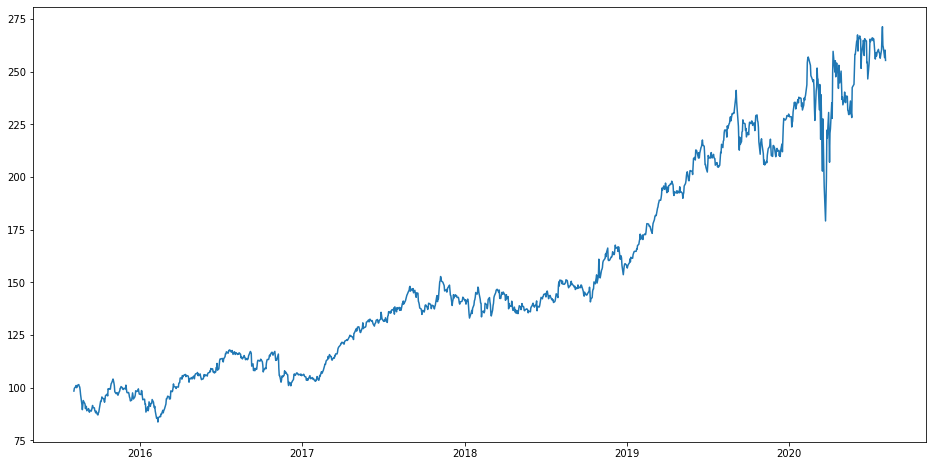

In [ ]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

##Split

In [ ]:
#creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

In [ ]:
# NOTE: I did not use random splitting since that will destroy the time component. 
# Validation starts 7/1/20 the new quarter and the day afetr the reporting
# splitting into train and validation
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#dataset = new_data.values

train = new_data[:1234]
valid = new_data[1234:]

dataset = train.values

valid.head()

,Close
Date,
2020-07-01,265.39
2020-07-02,264.21
2020-07-06,265.97
2020-07-07,265.97
2020-07-08,264.7


In [ ]:
train.tail()

,Close
Date,
2020-06-24,254.18
2020-06-25,254.36
2020-06-26,246.48
2020-06-29,253.8
2020-06-30,258.54


In [ ]:
valid.tail()

,Close
Date,
2020-07-30,262.49
2020-07-31,261.39
2020-08-03,256.58
2020-08-04,260.17
2020-08-05,255.29


In [ ]:
#shapes of the original set
print('\n Shape of the original set:')
print(new_data.shape)

# shapes of training set
print('\n Shape of training set:')
print(train.shape)

# shapes of validation set
print('\n Shape of validation set:')
print(valid.shape)


 Shape of the original set:
(1259, 1)

 Shape of training set:
(1234, 1)

 Shape of validation set:
(25, 1)


##LSTM

In [ ]:

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [ ]:
x_train.shape

(1174, 60, 1)

In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
s=X_test.shape
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

1174/1174 - 24s - loss: 0.0025


In [ ]:
inputs.shape

(85, 1)

In [ ]:
s

(25, 60, 1)

##Plotting

Plotting: 
- Closing Price Years 1-4 (Training) (Blue)
- Closing Price Year 5 Actual (Current Year) (Orange)
- Closing Price Year 5 Prediction (Current Year) (Green)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


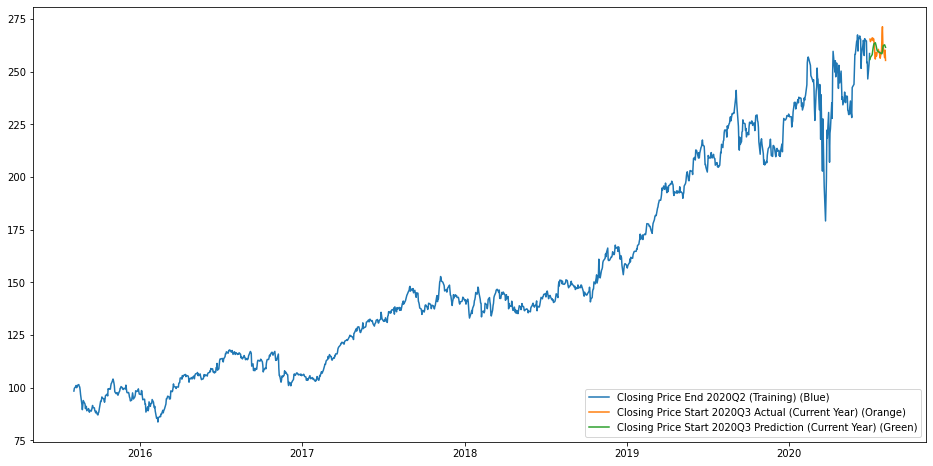

In [ ]:

valid['Predictions'] = closing_price

import matplotlib.patches as mpatches

plt.figure(figsize=(16,8))

#blue_patch = mpatches.Patch(color='blue', label='Closing Price Years 1-4 (Training) (Blue)')
#orange_patch = mpatches.Patch(color='orange', label='Closing Price Year 5 Actual (Current Year) (Orange)')
#green_patch = mpatches.Patch(color='green', label='Closing Price Year 5 Prediction (Current Year) (Green)')
#plt.legend(handles=[blue_patch,orange_patch,green_patch])

line1 = plt.plot(train['Close'],label='Closing Price End 2020Q2 (Training) (Blue)')
line2 = plt.plot(valid[['Close']],label='Closing Price Start 2020Q3 Actual (Current Year) (Orange)')
line3 = plt.plot(valid['Predictions'],label='Closing Price Start 2020Q3 Prediction (Current Year) (Green)')

plt.legend( loc='lower right')

plt.show()


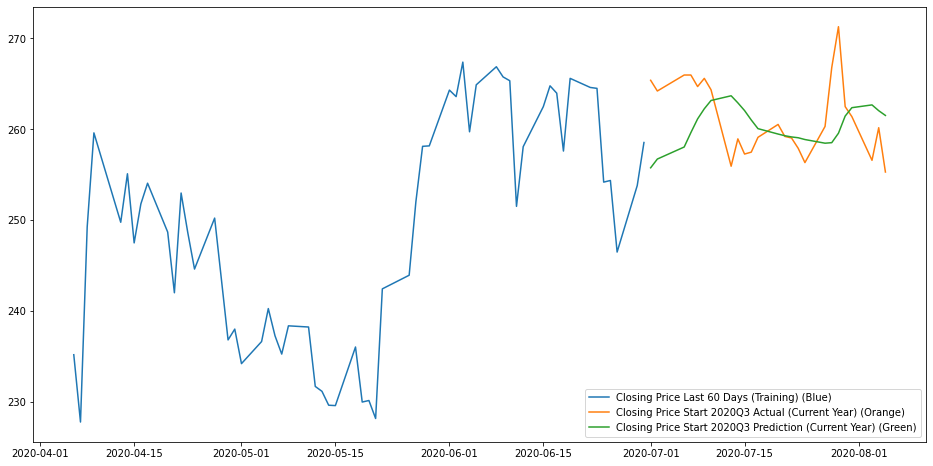

In [ ]:
show = train[-60:]


plt.figure(figsize=(16,8))

line1 = plt.plot(show['Close'],label='Closing Price Last 60 Days (Training) (Blue)')
line2 = plt.plot(valid[['Close']],label='Closing Price Start 2020Q3 Actual (Current Year) (Orange)')
line3 = plt.plot(valid['Predictions'],label='Closing Price Start 2020Q3 Prediction (Current Year) (Green)')

plt.legend( loc='lower right')

plt.show()

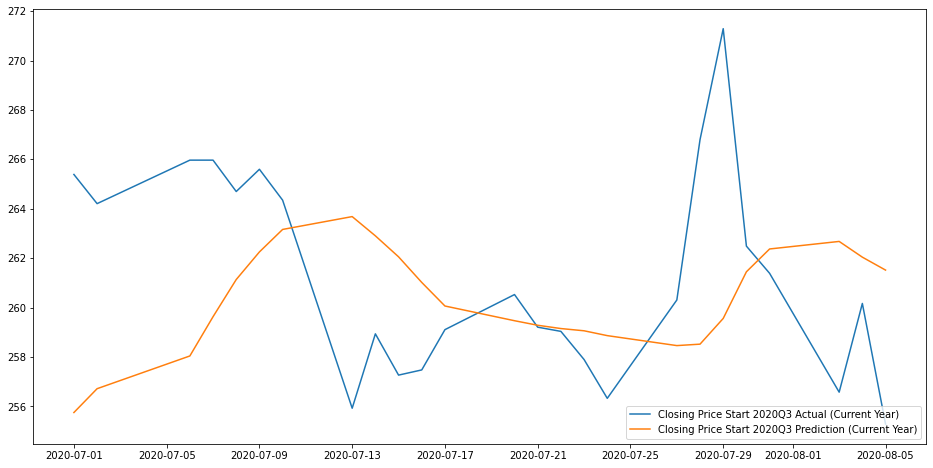

In [ ]:
plt.figure(figsize=(16,8))


line2 = plt.plot(valid[['Close']],label='Closing Price Start 2020Q3 Actual (Current Year)')
line3 = plt.plot(valid['Predictions'],label='Closing Price Start 2020Q3 Prediction (Current Year)')

plt.legend( loc='lower right')

plt.show()

##Predictions

In [ ]:
#Where is the highest closing price in the predicted zone
valid[['Predictions']].max()

Predictions    263.685333
dtype: float32

In [ ]:
#date of highest prediction
valid[['Predictions']].idxmax()

Predictions   2020-07-13
dtype: datetime64[ns]

In [ ]:
#valid.tail()

In [ ]:
#########
valid.to_csv('/content/drive/My Drive/AI/Datasets/Stock_Project/Predictions/prediction_AMT.csv')

In [ ]:
#date +/- week 
#valid_sub = valid.loc['2020-07-27':'2020-08-05']
#valid_sub

In [ ]:
print(valid.loc['2020-07-01'])

Close           265.39
Predictions    255.756
Name: 2020-07-01 00:00:00, dtype: object


In [ ]:
print(valid[valid.index=='2020-07-01'])

             Close  Predictions
Date                           
2020-07-01  265.39   255.756256


In [ ]:
print(valid[valid.Predictions == valid.Predictions.max()]) 

             Close  Predictions
Date                           
2020-07-13  255.93   263.685333


In [ ]:
res = valid[['Predictions']]
res.columns = ['Value']
res = res.sort_values(by='Value', ascending=False)
res = res[:1]

res2 = train
res2.columns = ['Value']
res2 = res2[-1:]

#res.head()
#res2.head()
result = res2.append(res)
result

,Value
Date,
2020-06-30,258.54
2020-07-13,263.685


In [ ]:
selldate = str(valid[['Predictions']].idxmax()[0])

In [ ]:
###############
plres2 = valid[['Predictions']]
plres2 = plres2.loc[:selldate]
plres2.columns =  ['AMT']
plres2.tail()

,AMT
Date,
2020-07-07,259.633759
2020-07-08,261.138245
2020-07-09,262.255157
2020-07-10,263.165344
2020-07-13,263.685333


In [ ]:
bvalue = result['Value'][0]

In [ ]:
#############
roil = []
for index, row in plres2.iterrows():
     roil.append( ((row['AMT']-	bvalue)/bvalue)*100)



In [ ]:
plres2['AMT_ROI (%)'] = roil

In [ ]:
plres2.tail()

,AMT,AMT_ROI (%)
Date,,
2020-07-07,259.633759,0.423048
2020-07-08,261.138245,1.004965
2020-07-09,262.255157,1.436972
2020-07-10,263.165344,1.789021
2020-07-13,263.685333,1.990146


In [ ]:
plres2.to_csv('/content/drive/My Drive/AI/Datasets/Stock_Project/Predictions/sell_AMT.csv')

##End Valuation

In [ ]:
#######
orig.loc[2]

Investment     American Tower, REIT
Shares/Par                1,840,700
Value ($)               475,894,578
% of Top 10                  10.15%
Name: 2, dtype: object

In [ ]:
bdate = str(result.index[0]) 
bdate = bdate.split(' ')
bdate = bdate[0]
bdate

'2020-06-30'

In [ ]:
sdate = str(result.index[1]) 
sdate = sdate.split(' ')
sdate = sdate[0]
sdate

'2020-07-13'

In [ ]:
ahigh = valid[['Close']]
ahigh = ahigh.sort_values(by='Close', ascending=False)
ahigh = ahigh[:1]
#ahigh

evalue = ahigh['Close'][0]
pp = round(evalue-bvalue,2)
ro = pp/bvalue
rop = ro*100
rop = round(rop,2)
rop

4.93

In [ ]:

bsvalue = round(result.Value[0],2)

esvalue = round(result.Value[1],2)
pps = round(esvalue-bsvalue,2)
roi = pps/bsvalue
roip = roi*100
roip =round(roip,2)



print('Begin Date: '+str(bdate))
print('Begin Value/Share: '+str(bsvalue))
print('Sell Date: '+str(sdate))
print('Sell Value/Share: '+str(esvalue))
print('Profit per Share: '+str(pps))
print('Return on Investment: '+str(roip)+'%')
print('\n')

###############
shares = locale.atoi(orig.loc[2]['Shares/Par'])
bvalue = locale.atoi(orig.loc[2]['Value ($)'])
svalue = round(shares * esvalue,2)
profit = round(svalue - bvalue,2)
print('Shares: '+str(shares))
print('Begin Value: '+str(bvalue))
print('Sell Value: '+str(svalue))
print('Total Profit: '+str(profit))
print('\n')

print('Actual Max Return on Investment: '+str(rop)+'%')


Begin Date: 2020-06-30
Begin Value/Share: 258.54
Sell Date: 2020-07-13
Sell Value/Share: 263.69
Profit per Share: 5.15
Return on Investment: 1.99%


Shares: 1840700
Begin Value: 475894578
Sell Value: 485374183.0
Total Profit: 9479605.0


Actual Max Return on Investment: 4.93%


##Update Final Table

In [ ]:
##########
final['Shares'].loc[2] = shares
final['Begin Date'].loc[2] = bdate
final['Begin Share Value'].loc[2] = bsvalue
final['Sell Date'].loc[2] = sdate
final['Sell Share Value'].loc[2] = esvalue
final['Profit Per Share'].loc[2] = pps
final['Begin Value'].loc[2] = bvalue
final['Sell Value'].loc[2] = svalue
final['Total Profit'].loc[2] = profit
final['ROI (%)'].loc[2] = roip
final['Actual Max ROI (%)'].loc[2] = rop

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
final

,Investment,Shares,Begin Date,Begin Share Value,Sell Date,Sell Share Value,Profit Per Share,Begin Value,Sell Value,Total Profit,ROI (%),Actual Max ROI (%)
0,Amazon,411600.0,2020-06-30,2758.82,2020-07-16,3072.70,313.88,1.135530e+09,1.264723e+09,129193008.0,11.38,16.17
1,Facebook,2132800.0,2020-06-30,227.07,2020-08-05,247.52,20.45,4.842949e+08,5.279107e+08,43615760.0,9.01,11.71
2,"American Tower, REIT",1840700.0,2020-06-30,258.54,2020-07-13,263.69,5.15,4.758946e+08,4.853742e+08,9479605.0,1.99,4.93
3,"Alibaba Group Holding, ADR",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Netflix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"Crown Castle International, REIT",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,T-Mobile US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,PayPal Holdings,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Alphabet Class C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Tencent Holdings,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Alibaba Group (BABA)

##Import

In [ ]:

#read the file
df = pd.read_csv('/content/drive/My Drive/AI/Datasets/Stock_Project/Alibaba/BABA.csv')

#print the head
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-08-06,79.849998,80.750000,78.639999,78.959999,78.959999,9297800
1,2015-08-07,79.650002,80.199997,78.660004,78.820000,78.820000,8738800
2,2015-08-10,79.860001,80.989998,79.500000,80.470001,80.470001,11276700
3,2015-08-11,79.481003,80.000000,76.150002,77.339996,77.339996,22976600
4,2015-08-12,72.320000,73.849998,71.029999,73.379997,73.379997,41093200


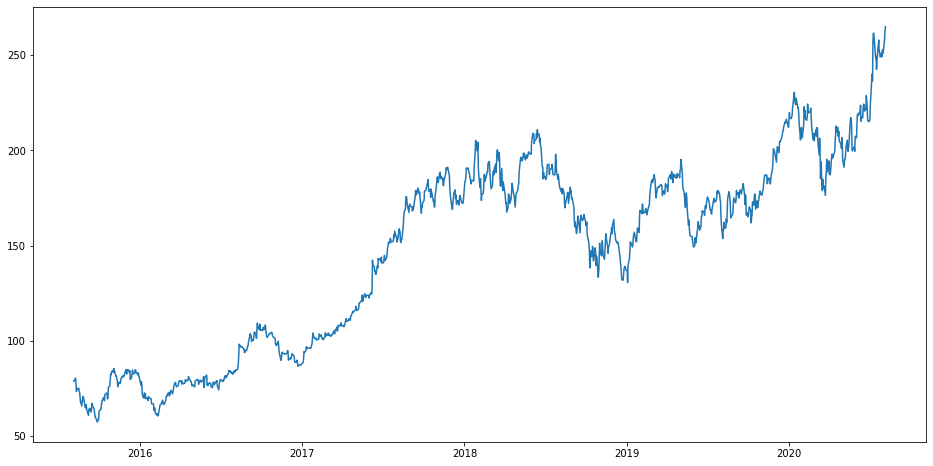

In [ ]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

##Split

In [ ]:
#creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

In [ ]:
# NOTE: I did not use random splitting since that will destroy the time component. 
# Validation starts 7/1/20 the new quarter and the day afetr the reporting
# splitting into train and validation
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#dataset = new_data.values

train = new_data[:1234]
valid = new_data[1234:]

dataset = train.values

valid.head()

,Close
Date,
2020-07-01,215.95
2020-07-02,223.6
2020-07-06,240
2020-07-07,236.51
2020-07-08,257.68


In [ ]:
train.tail()

,Close
Date,
2020-06-24,226.22
2020-06-25,222.16
2020-06-26,215.71
2020-06-29,215.02
2020-06-30,215.7


In [ ]:
valid.tail()

,Close
Date,
2020-07-30,252.74
2020-07-31,251.02
2020-08-03,257.94
2020-08-04,262.2
2020-08-05,264.91


In [ ]:
#shapes of the original set
print('\n Shape of the original set:')
print(new_data.shape)

# shapes of training set
print('\n Shape of training set:')
print(train.shape)

# shapes of validation set
print('\n Shape of validation set:')
print(valid.shape)


 Shape of the original set:
(1259, 1)

 Shape of training set:
(1234, 1)

 Shape of validation set:
(25, 1)


##LSTM

In [ ]:

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [ ]:
x_train.shape

(1174, 60, 1)

In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
s=X_test.shape
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

1174/1174 - 24s - loss: 0.0033


In [ ]:
inputs.shape

(85, 1)

In [ ]:
s

(25, 60, 1)

##Plotting

Plotting: 
- Closing Price Years 1-4 (Training) (Blue)
- Closing Price Year 5 Actual (Current Year) (Orange)
- Closing Price Year 5 Prediction (Current Year) (Green)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


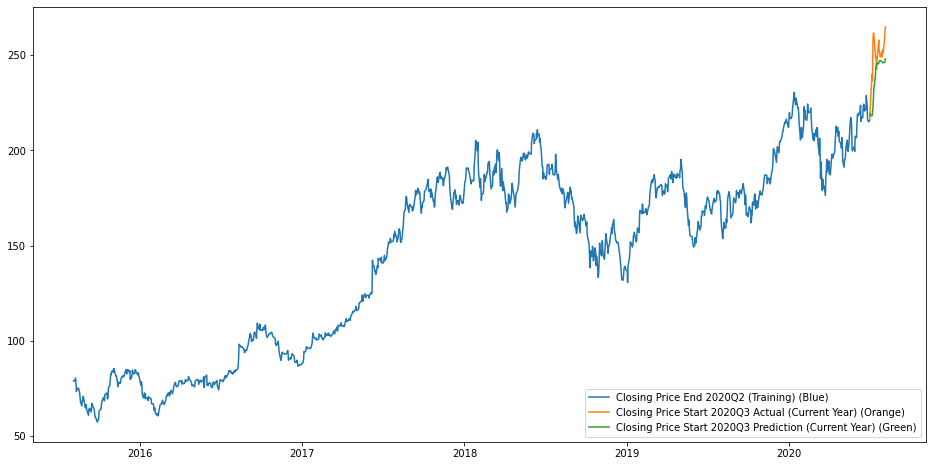

In [ ]:

valid['Predictions'] = closing_price

import matplotlib.patches as mpatches

plt.figure(figsize=(16,8))

#blue_patch = mpatches.Patch(color='blue', label='Closing Price Years 1-4 (Training) (Blue)')
#orange_patch = mpatches.Patch(color='orange', label='Closing Price Year 5 Actual (Current Year) (Orange)')
#green_patch = mpatches.Patch(color='green', label='Closing Price Year 5 Prediction (Current Year) (Green)')
#plt.legend(handles=[blue_patch,orange_patch,green_patch])

line1 = plt.plot(train['Close'],label='Closing Price End 2020Q2 (Training) (Blue)')
line2 = plt.plot(valid[['Close']],label='Closing Price Start 2020Q3 Actual (Current Year) (Orange)')
line3 = plt.plot(valid['Predictions'],label='Closing Price Start 2020Q3 Prediction (Current Year) (Green)')

plt.legend( loc='lower right')

plt.show()


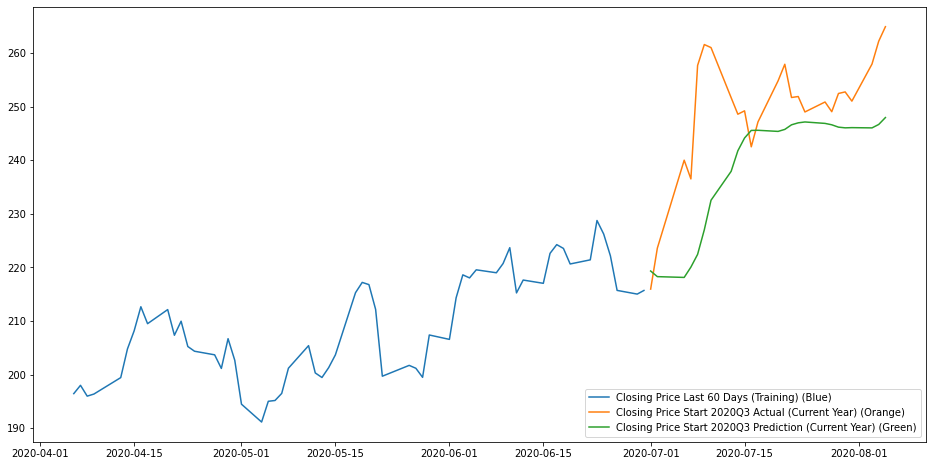

In [ ]:
show = train[-60:]


plt.figure(figsize=(16,8))

line1 = plt.plot(show['Close'],label='Closing Price Last 60 Days (Training) (Blue)')
line2 = plt.plot(valid[['Close']],label='Closing Price Start 2020Q3 Actual (Current Year) (Orange)')
line3 = plt.plot(valid['Predictions'],label='Closing Price Start 2020Q3 Prediction (Current Year) (Green)')

plt.legend( loc='lower right')

plt.show()

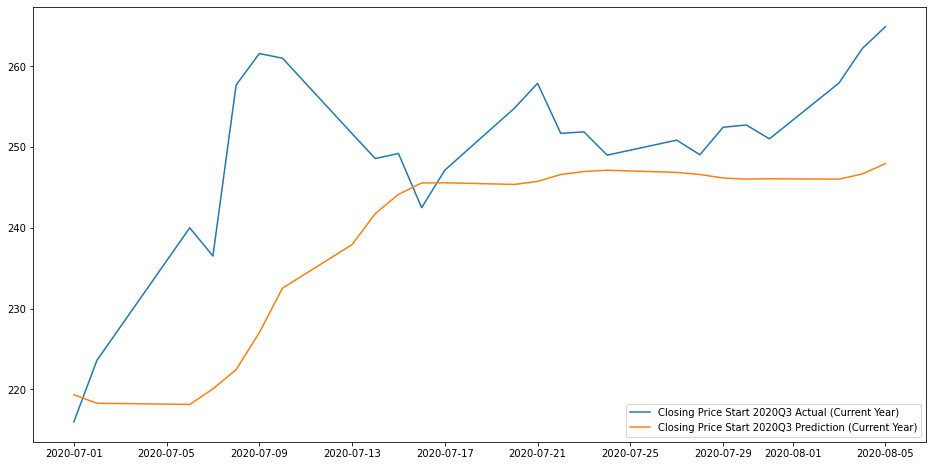

In [ ]:
plt.figure(figsize=(16,8))


line2 = plt.plot(valid[['Close']],label='Closing Price Start 2020Q3 Actual (Current Year)')
line3 = plt.plot(valid['Predictions'],label='Closing Price Start 2020Q3 Prediction (Current Year)')

plt.legend( loc='lower right')

plt.show()

##Predictions

In [ ]:
#Where is the highest closing price in the predicted zone
valid[['Predictions']].max()

Predictions    247.957214
dtype: float32

In [ ]:
#date of highest prediction
valid[['Predictions']].idxmax()

Predictions   2020-08-05
dtype: datetime64[ns]

In [ ]:
#valid.tail()

In [ ]:
#########
valid.to_csv('/content/drive/My Drive/AI/Datasets/Stock_Project/Predictions/prediction_BABA.csv')

In [ ]:
#date +/- week 
#valid_sub = valid.loc['2020-07-27':'2020-08-05']
#valid_sub

In [ ]:
print(valid.loc['2020-07-01'])

Close           215.95
Predictions    219.327
Name: 2020-07-01 00:00:00, dtype: object


In [ ]:
print(valid[valid.index=='2020-07-01'])

             Close  Predictions
Date                           
2020-07-01  215.95   219.326828


In [ ]:
print(valid[valid.Predictions == valid.Predictions.max()]) 

             Close  Predictions
Date                           
2020-08-05  264.91   247.957214


In [ ]:
res = valid[['Predictions']]
res.columns = ['Value']
res = res.sort_values(by='Value', ascending=False)
res = res[:1]

res2 = train
res2.columns = ['Value']
res2 = res2[-1:]

#res.head()
#res2.head()
result = res2.append(res)
result

,Value
Date,
2020-06-30,215.7
2020-08-05,247.957


In [ ]:
selldate = str(valid[['Predictions']].idxmax()[0])

In [ ]:
###############
plres3 = valid[['Predictions']]
plres3 = plres3.loc[:selldate]
plres3.columns =  ['BABA']
plres3.tail()

,BABA
Date,
2020-07-30,246.037720
2020-07-31,246.075424
2020-08-03,246.028778
2020-08-04,246.667282
2020-08-05,247.957214


In [ ]:
bvalue = result['Value'][0]

In [ ]:
#############
roil = []
for index, row in plres3.iterrows():
     roil.append( ((row['BABA']-	bvalue)/bvalue)*100)



In [ ]:
plres3['BABA_ROI (%)'] = roil

In [ ]:
plres3.tail()

,BABA,BABA_ROI (%)
Date,,
2020-07-30,246.037720,14.064777
2020-07-31,246.075424,14.082257
2020-08-03,246.028778,14.060631
2020-08-04,246.667282,14.356646
2020-08-05,247.957214,14.954668


In [ ]:
plres3.to_csv('/content/drive/My Drive/AI/Datasets/Stock_Project/Predictions/sell_BABA.csv')

##End Valuation

In [ ]:
#######
orig.loc[3]

Investment     Alibaba Group Holding, ADR
Shares/Par                      2,021,134
Value ($)                     435,958,604
% of Top 10                         9.30%
Name: 3, dtype: object

In [ ]:
bdate = str(result.index[0]) 
bdate = bdate.split(' ')
bdate = bdate[0]
bdate

'2020-06-30'

In [ ]:
sdate = str(result.index[1]) 
sdate = sdate.split(' ')
sdate = sdate[0]
sdate

'2020-08-05'

In [ ]:
ahigh = valid[['Close']]
ahigh = ahigh.sort_values(by='Close', ascending=False)
ahigh = ahigh[:1]
#ahigh

evalue = ahigh['Close'][0]
pp = round(evalue-bvalue,2)
ro = pp/bvalue
rop = ro*100
rop = round(rop,2)
rop

22.81

In [ ]:

bsvalue = round(result.Value[0],2)

esvalue = round(result.Value[1],2)
pps = round(esvalue-bsvalue,2)
roi = pps/bsvalue
roip = roi*100
roip =round(roip,2)



print('Begin Date: '+str(bdate))
print('Begin Value/Share: '+str(bsvalue))
print('Sell Date: '+str(sdate))
print('Sell Value/Share: '+str(esvalue))
print('Profit per Share: '+str(pps))
print('Return on Investment: '+str(roip)+'%')
print('\n')

###############
shares = locale.atoi(orig.loc[3]['Shares/Par'])
bvalue = locale.atoi(orig.loc[3]['Value ($)'])
svalue = round(shares * esvalue,2)
profit = round(svalue - bvalue,2)
print('Shares: '+str(shares))
print('Begin Value: '+str(bvalue))
print('Sell Value: '+str(svalue))
print('Total Profit: '+str(profit))
print('\n')

print('Actual Max Return on Investment: '+str(rop)+'%')


Begin Date: 2020-06-30
Begin Value/Share: 215.7
Sell Date: 2020-08-05
Sell Value/Share: 247.96
Profit per Share: 32.26
Return on Investment: 14.96%


Shares: 2021134
Begin Value: 435958604
Sell Value: 501160386.64
Total Profit: 65201782.64


Actual Max Return on Investment: 22.81%


##Update Final Table

In [ ]:
##########
final['Shares'].loc[3] = shares
final['Begin Date'].loc[3] = bdate
final['Begin Share Value'].loc[3] = bsvalue
final['Sell Date'].loc[3] = sdate
final['Sell Share Value'].loc[3] = esvalue
final['Profit Per Share'].loc[3] = pps
final['Begin Value'].loc[3] = bvalue
final['Sell Value'].loc[3] = svalue
final['Total Profit'].loc[3] = profit
final['ROI (%)'].loc[3] = roip
final['Actual Max ROI (%)'].loc[3] = rop

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
final

,Investment,Shares,Begin Date,Begin Share Value,Sell Date,Sell Share Value,Profit Per Share,Begin Value,Sell Value,Total Profit,ROI (%),Actual Max ROI (%)
0,Amazon,411600.0,2020-06-30,2758.82,2020-07-16,3072.70,313.88,1.135530e+09,1.264723e+09,1.291930e+08,11.38,16.17
1,Facebook,2132800.0,2020-06-30,227.07,2020-08-05,247.52,20.45,4.842949e+08,5.279107e+08,4.361576e+07,9.01,11.71
2,"American Tower, REIT",1840700.0,2020-06-30,258.54,2020-07-13,263.69,5.15,4.758946e+08,4.853742e+08,9.479605e+06,1.99,4.93
3,"Alibaba Group Holding, ADR",2021134.0,2020-06-30,215.70,2020-08-05,247.96,32.26,4.359586e+08,5.011604e+08,6.520178e+07,14.96,22.81
4,Netflix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"Crown Castle International, REIT",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,T-Mobile US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,PayPal Holdings,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Alphabet Class C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Tencent Holdings,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Netflix (NFLX)

##Import

In [ ]:

#read the file
df = pd.read_csv('/content/drive/My Drive/AI/Datasets/Stock_Project/Netflix/NFLX.csv')

#print the head
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-08-06,126.290001,128.850006,122.040001,126.449997,126.449997,24716700
1,2015-08-07,126.419998,126.599998,121.300003,123.519997,123.519997,17360700
2,2015-08-10,126.089996,126.500000,121.510002,123.029999,123.029999,13424600
3,2015-08-11,120.010002,123.760002,120.000000,122.739998,122.739998,11596800
4,2015-08-12,121.470001,122.449997,118.660004,120.510002,120.510002,13822500


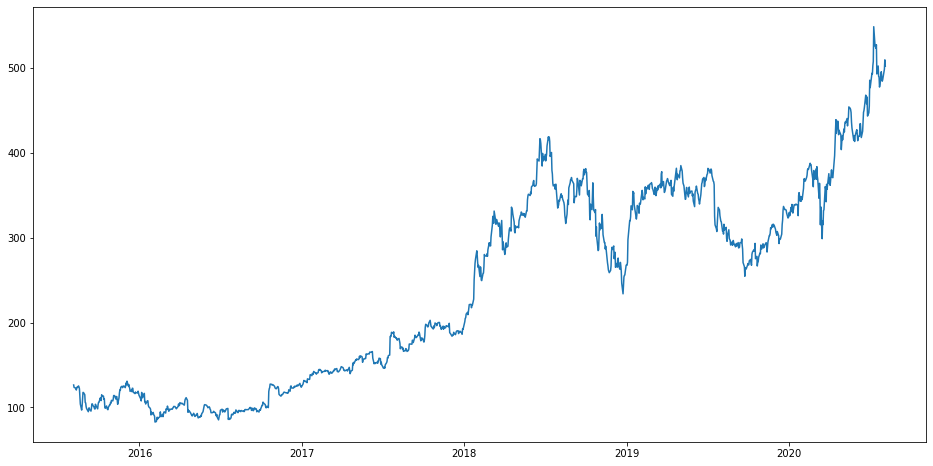

In [ ]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

##Split

In [ ]:
#creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

In [ ]:
# NOTE: I did not use random splitting since that will destroy the time component. 
# Validation starts 7/1/20 the new quarter and the day afetr the reporting
# splitting into train and validation
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#dataset = new_data.values

train = new_data[:1234]
valid = new_data[1234:]

dataset = train.values

valid.head()

,Close
Date,
2020-07-01,485.64
2020-07-02,476.89
2020-07-06,493.81
2020-07-07,493.16
2020-07-08,502.78


In [ ]:
train.tail()

,Close
Date,
2020-06-24,457.85
2020-06-25,465.91
2020-06-26,443.4
2020-06-29,447.24
2020-06-30,455.04


In [ ]:
valid.tail()

,Close
Date,
2020-07-30,485.8
2020-07-31,488.88
2020-08-03,498.62
2020-08-04,509.64
2020-08-05,502.11


In [ ]:
#shapes of the original set
print('\n Shape of the original set:')
print(new_data.shape)

# shapes of training set
print('\n Shape of training set:')
print(train.shape)

# shapes of validation set
print('\n Shape of validation set:')
print(valid.shape)


 Shape of the original set:
(1259, 1)

 Shape of training set:
(1234, 1)

 Shape of validation set:
(25, 1)


##LSTM

In [ ]:

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [ ]:
x_train.shape

(1174, 60, 1)

In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
s=X_test.shape
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

1174/1174 - 25s - loss: 0.0027


In [ ]:
inputs.shape

(85, 1)

In [ ]:
s

(25, 60, 1)

##Plotting

Plotting: 
- Closing Price Years 1-4 (Training) (Blue)
- Closing Price Year 5 Actual (Current Year) (Orange)
- Closing Price Year 5 Prediction (Current Year) (Green)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


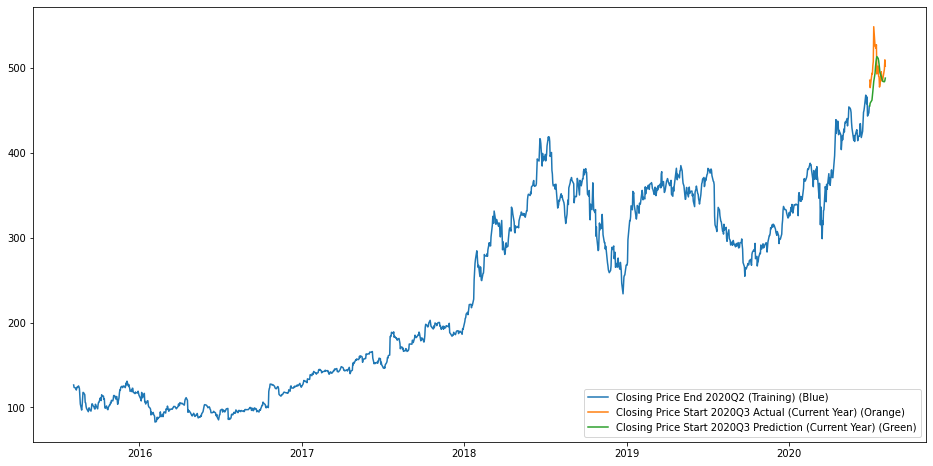

In [ ]:

valid['Predictions'] = closing_price

import matplotlib.patches as mpatches

plt.figure(figsize=(16,8))

#blue_patch = mpatches.Patch(color='blue', label='Closing Price Years 1-4 (Training) (Blue)')
#orange_patch = mpatches.Patch(color='orange', label='Closing Price Year 5 Actual (Current Year) (Orange)')
#green_patch = mpatches.Patch(color='green', label='Closing Price Year 5 Prediction (Current Year) (Green)')
#plt.legend(handles=[blue_patch,orange_patch,green_patch])

line1 = plt.plot(train['Close'],label='Closing Price End 2020Q2 (Training) (Blue)')
line2 = plt.plot(valid[['Close']],label='Closing Price Start 2020Q3 Actual (Current Year) (Orange)')
line3 = plt.plot(valid['Predictions'],label='Closing Price Start 2020Q3 Prediction (Current Year) (Green)')

plt.legend( loc='lower right')

plt.show()


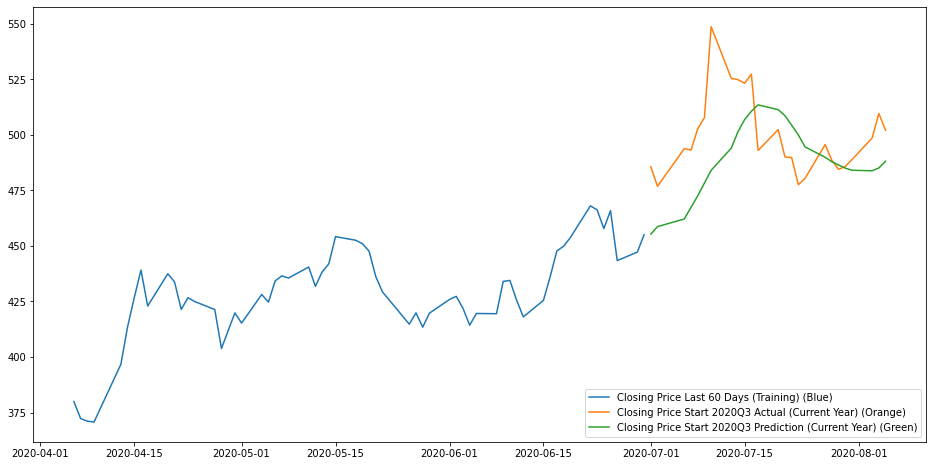

In [ ]:
show = train[-60:]


plt.figure(figsize=(16,8))

line1 = plt.plot(show['Close'],label='Closing Price Last 60 Days (Training) (Blue)')
line2 = plt.plot(valid[['Close']],label='Closing Price Start 2020Q3 Actual (Current Year) (Orange)')
line3 = plt.plot(valid['Predictions'],label='Closing Price Start 2020Q3 Prediction (Current Year) (Green)')

plt.legend( loc='lower right')

plt.show()

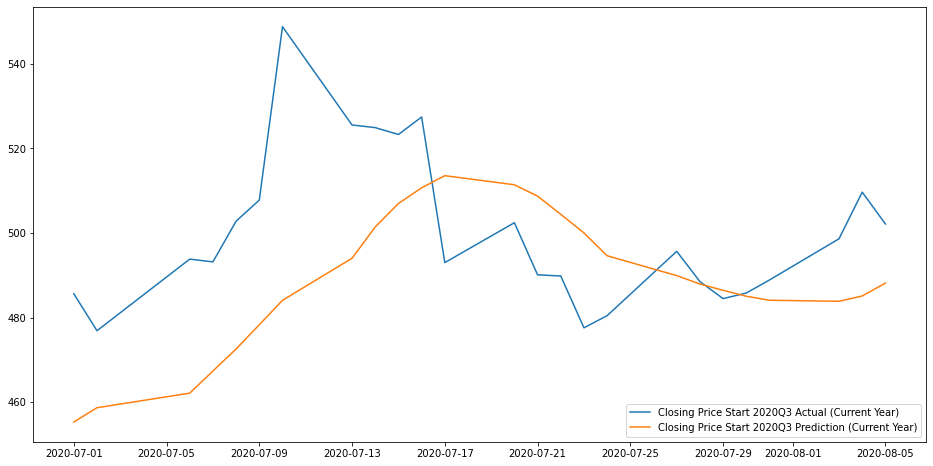

In [ ]:
plt.figure(figsize=(16,8))


line2 = plt.plot(valid[['Close']],label='Closing Price Start 2020Q3 Actual (Current Year)')
line3 = plt.plot(valid['Predictions'],label='Closing Price Start 2020Q3 Prediction (Current Year)')

plt.legend( loc='lower right')

plt.show()

##Predictions

In [ ]:
#Where is the highest closing price in the predicted zone
valid[['Predictions']].max()

Predictions    513.530457
dtype: float32

In [ ]:
#date of highest prediction
valid[['Predictions']].idxmax()

Predictions   2020-07-17
dtype: datetime64[ns]

In [ ]:
#valid.tail()

In [ ]:
#########
valid.to_csv('/content/drive/My Drive/AI/Datasets/Stock_Project/Predictions/prediction_NFLX.csv')

In [ ]:
#date +/- week 
#valid_sub = valid.loc['2020-07-27':'2020-08-05']
#valid_sub

In [ ]:
print(valid.loc['2020-07-01'])

Close           485.64
Predictions    455.317
Name: 2020-07-01 00:00:00, dtype: object


In [ ]:
print(valid[valid.index=='2020-07-01'])

             Close  Predictions
Date                           
2020-07-01  485.64   455.317078


In [ ]:
print(valid[valid.Predictions == valid.Predictions.max()]) 

             Close  Predictions
Date                           
2020-07-17  492.99   513.530457


In [ ]:
res = valid[['Predictions']]
res.columns = ['Value']
res = res.sort_values(by='Value', ascending=False)
res = res[:1]

res2 = train
res2.columns = ['Value']
res2 = res2[-1:]

#res.head()
#res2.head()
result = res2.append(res)
result

,Value
Date,
2020-06-30,455.04
2020-07-17,513.53


In [ ]:
selldate = str(valid[['Predictions']].idxmax()[0])

In [ ]:
###############
plres4 = valid[['Predictions']]
plres4 = plres4.loc[:selldate]
plres4.columns =  ['NFLX']
plres4.tail()

,NFLX
Date,
2020-07-13,494.020538
2020-07-14,501.421875
2020-07-15,506.947174
2020-07-16,510.661713
2020-07-17,513.530457


In [ ]:
bvalue = result['Value'][0]

In [ ]:
#############
roil = []
for index, row in plres4.iterrows():
     roil.append( ((row['NFLX']-	bvalue)/bvalue)*100)



In [ ]:
plres4['NFLX_ROI (%)'] = roil

In [ ]:
plres4.tail()

,NFLX,NFLX_ROI (%)
Date,,
2020-07-13,494.020538,8.566396
2020-07-14,501.421875,10.192920
2020-07-15,506.947174,11.407165
2020-07-16,510.661713,12.223475
2020-07-17,513.530457,12.853913


In [ ]:
plres4.to_csv('/content/drive/My Drive/AI/Datasets/Stock_Project/Predictions/sell_NFLX.csv')

##End Valuation

In [ ]:
#######
orig.loc[4]

Investment         Netflix
Shares/Par         886,480
Value ($)      403,383,859
% of Top 10          8.61%
Name: 4, dtype: object

In [ ]:
bdate = str(result.index[0]) 
bdate = bdate.split(' ')
bdate = bdate[0]
bdate

'2020-06-30'

In [ ]:
sdate = str(result.index[1]) 
sdate = sdate.split(' ')
sdate = sdate[0]
sdate

'2020-07-17'

In [ ]:
ahigh = valid[['Close']]
ahigh = ahigh.sort_values(by='Close', ascending=False)
ahigh = ahigh[:1]
#ahigh

evalue = ahigh['Close'][0]
pp = round(evalue-bvalue,2)
ro = pp/bvalue
rop = ro*100
rop = round(rop,2)
rop

20.59

In [ ]:

bsvalue = round(result.Value[0],2)

esvalue = round(result.Value[1],2)
pps = round(esvalue-bsvalue,2)
roi = pps/bsvalue
roip = roi*100
roip =round(roip,2)



print('Begin Date: '+str(bdate))
print('Begin Value/Share: '+str(bsvalue))
print('Sell Date: '+str(sdate))
print('Sell Value/Share: '+str(esvalue))
print('Profit per Share: '+str(pps))
print('Return on Investment: '+str(roip)+'%')
print('\n')

###############
shares = locale.atoi(orig.loc[4]['Shares/Par'])
bvalue = locale.atoi(orig.loc[4]['Value ($)'])
svalue = round(shares * esvalue,2)
profit = round(svalue - bvalue,2)
print('Shares: '+str(shares))
print('Begin Value: '+str(bvalue))
print('Sell Value: '+str(svalue))
print('Total Profit: '+str(profit))
print('\n')

print('Actual Max Return on Investment: '+str(rop)+'%')


Begin Date: 2020-06-30
Begin Value/Share: 455.04
Sell Date: 2020-07-17
Sell Value/Share: 513.53
Profit per Share: 58.49
Return on Investment: 12.85%


Shares: 886480
Begin Value: 403383859
Sell Value: 455234074.4
Total Profit: 51850215.4


Actual Max Return on Investment: 20.59%


##Update Final Table

In [ ]:
##########
final['Shares'].loc[4] = shares
final['Begin Date'].loc[4] = bdate
final['Begin Share Value'].loc[4] = bsvalue
final['Sell Date'].loc[4] = sdate
final['Sell Share Value'].loc[4] = esvalue
final['Profit Per Share'].loc[4] = pps
final['Begin Value'].loc[4] = bvalue
final['Sell Value'].loc[4] = svalue
final['Total Profit'].loc[4] = profit
final['ROI (%)'].loc[4] = roip
final['Actual Max ROI (%)'].loc[4] = rop

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
final

,Investment,Shares,Begin Date,Begin Share Value,Sell Date,Sell Share Value,Profit Per Share,Begin Value,Sell Value,Total Profit,ROI (%),Actual Max ROI (%)
0,Amazon,411600.0,2020-06-30,2758.82,2020-07-16,3072.70,313.88,1.135530e+09,1.264723e+09,1.291930e+08,11.38,16.17
1,Facebook,2132800.0,2020-06-30,227.07,2020-08-05,247.52,20.45,4.842949e+08,5.279107e+08,4.361576e+07,9.01,11.71
2,"American Tower, REIT",1840700.0,2020-06-30,258.54,2020-07-13,263.69,5.15,4.758946e+08,4.853742e+08,9.479605e+06,1.99,4.93
3,"Alibaba Group Holding, ADR",2021134.0,2020-06-30,215.70,2020-08-05,247.96,32.26,4.359586e+08,5.011604e+08,6.520178e+07,14.96,22.81
4,Netflix,886480.0,2020-06-30,455.04,2020-07-17,513.53,58.49,4.033839e+08,4.552341e+08,5.185022e+07,12.85,20.59
5,"Crown Castle International, REIT",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,T-Mobile US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,PayPal Holdings,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Alphabet Class C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Tencent Holdings,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Crown Castle International, REIT (CCI)

##Import

In [ ]:

#read the file
df = pd.read_csv('/content/drive/My Drive/AI/Datasets/Stock_Project/Crown_Castle_International_REIT/CCI.csv')

#print the head
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-08-06,82.430000,82.680000,81.889999,82.040001,67.965240,1777500
1,2015-08-07,81.769997,82.489998,81.769997,82.339996,68.213776,1615100
2,2015-08-10,82.839996,83.639999,82.559998,83.550003,69.216194,1536700
3,2015-08-11,83.260002,84.739998,83.180000,84.180000,69.738113,2002100
4,2015-08-12,83.949997,85.000000,83.680000,84.949997,70.375984,2049200


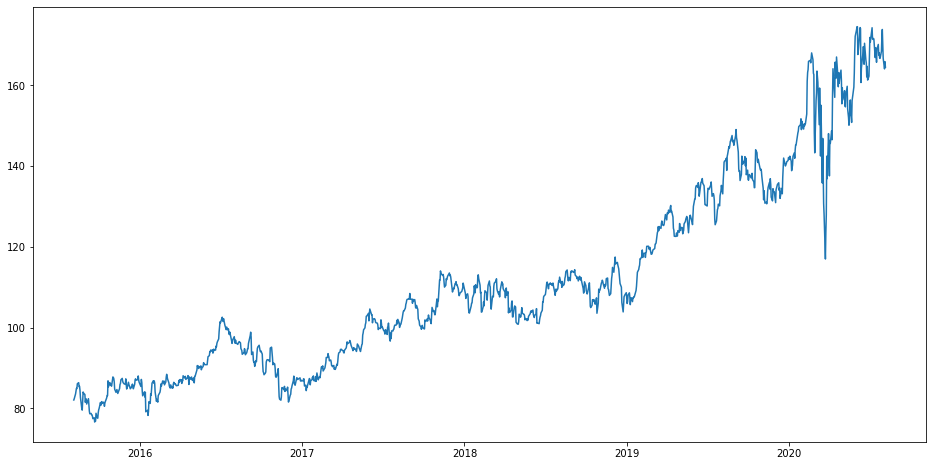

In [ ]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

##Split

In [ ]:
#creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

In [ ]:
# NOTE: I did not use random splitting since that will destroy the time component. 
# Validation starts 7/1/20 the new quarter and the day afetr the reporting
# splitting into train and validation
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#dataset = new_data.values

train = new_data[:1234]
valid = new_data[1234:]

dataset = train.values

valid.head()

,Close
Date,
2020-07-01,171.89
2020-07-02,170.72
2020-07-06,174.3
2020-07-07,171.51
2020-07-08,171.41


In [ ]:
train.tail()

,Close
Date,
2020-06-24,162.1
2020-06-25,164.72
2020-06-26,161.33
2020-06-29,162.3
2020-06-30,167.35


In [ ]:
valid.tail()

,Close
Date,
2020-07-30,170.21
2020-07-31,166.7
2020-08-03,164.1
2020-08-04,165.88
2020-08-05,164.52


In [ ]:
#shapes of the original set
print('\n Shape of the original set:')
print(new_data.shape)

# shapes of training set
print('\n Shape of training set:')
print(train.shape)

# shapes of validation set
print('\n Shape of validation set:')
print(valid.shape)


 Shape of the original set:
(1259, 1)

 Shape of training set:
(1234, 1)

 Shape of validation set:
(25, 1)


##LSTM

In [ ]:

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [ ]:
x_train.shape

(1174, 60, 1)

In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
s=X_test.shape
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

1174/1174 - 25s - loss: 0.0032


In [ ]:
inputs.shape

(85, 1)

In [ ]:
s

(25, 60, 1)

##Plotting

Plotting: 
- Closing Price Years 1-4 (Training) (Blue)
- Closing Price Year 5 Actual (Current Year) (Orange)
- Closing Price Year 5 Prediction (Current Year) (Green)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


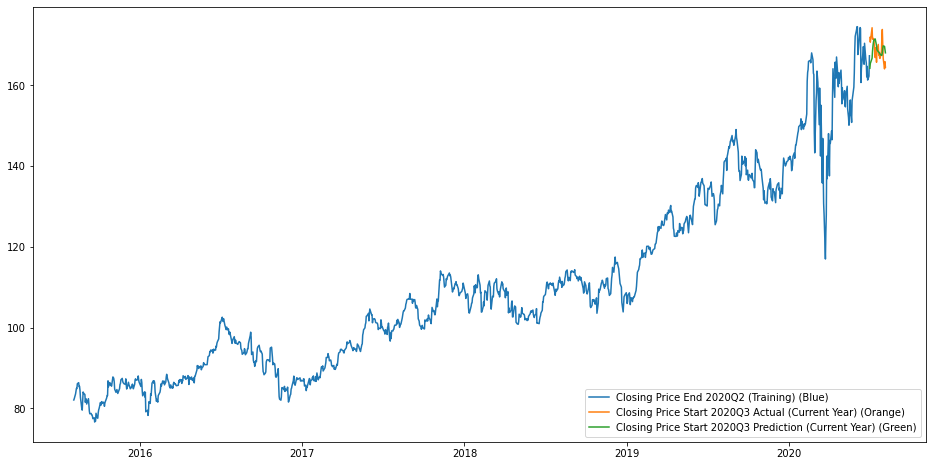

In [ ]:

valid['Predictions'] = closing_price

import matplotlib.patches as mpatches

plt.figure(figsize=(16,8))

#blue_patch = mpatches.Patch(color='blue', label='Closing Price Years 1-4 (Training) (Blue)')
#orange_patch = mpatches.Patch(color='orange', label='Closing Price Year 5 Actual (Current Year) (Orange)')
#green_patch = mpatches.Patch(color='green', label='Closing Price Year 5 Prediction (Current Year) (Green)')
#plt.legend(handles=[blue_patch,orange_patch,green_patch])

line1 = plt.plot(train['Close'],label='Closing Price End 2020Q2 (Training) (Blue)')
line2 = plt.plot(valid[['Close']],label='Closing Price Start 2020Q3 Actual (Current Year) (Orange)')
line3 = plt.plot(valid['Predictions'],label='Closing Price Start 2020Q3 Prediction (Current Year) (Green)')

plt.legend( loc='lower right')

plt.show()


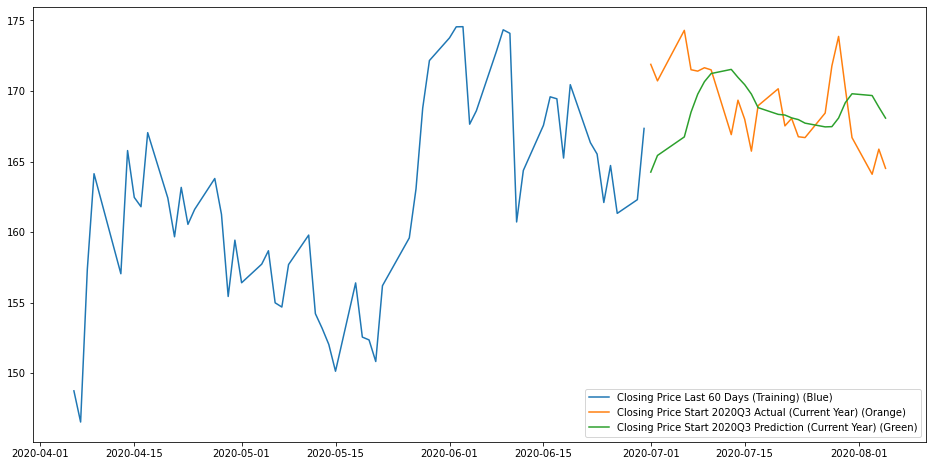

In [ ]:
show = train[-60:]


plt.figure(figsize=(16,8))

line1 = plt.plot(show['Close'],label='Closing Price Last 60 Days (Training) (Blue)')
line2 = plt.plot(valid[['Close']],label='Closing Price Start 2020Q3 Actual (Current Year) (Orange)')
line3 = plt.plot(valid['Predictions'],label='Closing Price Start 2020Q3 Prediction (Current Year) (Green)')

plt.legend( loc='lower right')

plt.show()

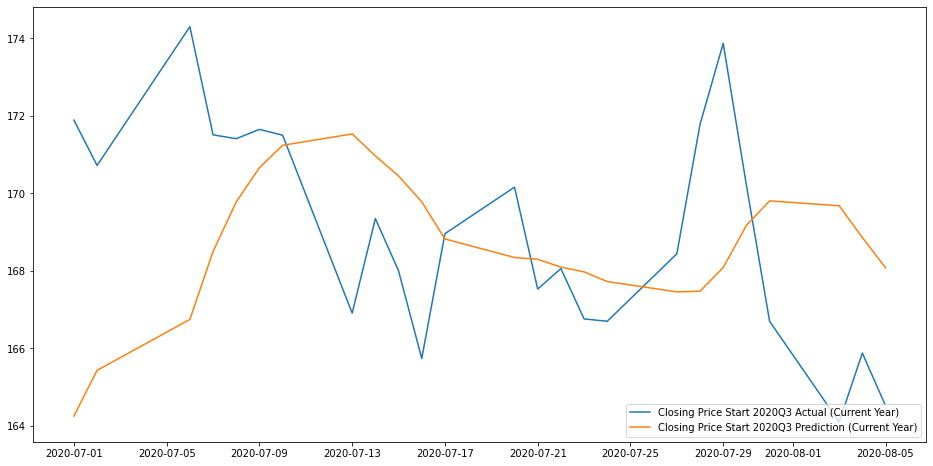

In [ ]:
plt.figure(figsize=(16,8))


line2 = plt.plot(valid[['Close']],label='Closing Price Start 2020Q3 Actual (Current Year)')
line3 = plt.plot(valid['Predictions'],label='Closing Price Start 2020Q3 Prediction (Current Year)')

plt.legend( loc='lower right')

plt.show()

##Predictions

In [ ]:
#Where is the highest closing price in the predicted zone
valid[['Predictions']].max()

Predictions    171.53334
dtype: float32

In [ ]:
#date of highest prediction
valid[['Predictions']].idxmax()

Predictions   2020-07-13
dtype: datetime64[ns]

In [ ]:
#valid.tail()

In [ ]:
#########
valid.to_csv('/content/drive/My Drive/AI/Datasets/Stock_Project/Predictions/prediction_CCI.csv')

In [ ]:
#date +/- week 
#valid_sub = valid.loc['2020-07-27':'2020-08-05']
#valid_sub

In [ ]:
print(valid.loc['2020-07-01'])

Close           171.89
Predictions    164.254
Name: 2020-07-01 00:00:00, dtype: object


In [ ]:
print(valid[valid.index=='2020-07-01'])

             Close  Predictions
Date                           
2020-07-01  171.89   164.254303


In [ ]:
print(valid[valid.Predictions == valid.Predictions.max()]) 

             Close  Predictions
Date                           
2020-07-13  166.91    171.53334


In [ ]:
res = valid[['Predictions']]
res.columns = ['Value']
res = res.sort_values(by='Value', ascending=False)
res = res[:1]

res2 = train
res2.columns = ['Value']
res2 = res2[-1:]

#res.head()
#res2.head()
result = res2.append(res)
result

,Value
Date,
2020-06-30,167.35
2020-07-13,171.533


In [ ]:
selldate = str(valid[['Predictions']].idxmax()[0])

In [ ]:
###############
plres5 = valid[['Predictions']]
plres5 = plres5.loc[:selldate]
plres5.columns =  ['CCI']
plres5.tail()

,CCI
Date,
2020-07-07,168.499130
2020-07-08,169.777908
2020-07-09,170.662247
2020-07-10,171.239288
2020-07-13,171.533340


In [ ]:
bvalue = result['Value'][0]

In [ ]:
#############
roil = []
for index, row in plres5.iterrows():
     roil.append( ((row['CCI']-	bvalue)/bvalue)*100)



In [ ]:
plres5['CCI_ROI (%)'] = roil

In [ ]:
plres5.tail()

,CCI,CCI_ROI (%)
Date,,
2020-07-07,168.499130,0.686659
2020-07-08,169.777908,1.450793
2020-07-09,170.662247,1.979230
2020-07-10,171.239288,2.324041
2020-07-13,171.533340,2.499752


In [ ]:
plres5.to_csv('/content/drive/My Drive/AI/Datasets/Stock_Project/Predictions/sell_CCI.csv')

##End Valuation

In [ ]:
#######
orig.loc[5]

Investment     Crown Castle International, REIT
Shares/Par                            2,364,468
Value ($)                           395,693,720
% of Top 10                               8.44%
Name: 5, dtype: object

In [ ]:
bdate = str(result.index[0]) 
bdate = bdate.split(' ')
bdate = bdate[0]
bdate

'2020-06-30'

In [ ]:
sdate = str(result.index[1]) 
sdate = sdate.split(' ')
sdate = sdate[0]
sdate

'2020-07-13'

In [ ]:
ahigh = valid[['Close']]
ahigh = ahigh.sort_values(by='Close', ascending=False)
ahigh = ahigh[:1]
#ahigh

evalue = ahigh['Close'][0]
pp = round(evalue-bvalue,2)
ro = pp/bvalue
rop = ro*100
rop = round(rop,2)
rop

4.15

In [ ]:

bsvalue = round(result.Value[0],2)

esvalue = round(result.Value[1],2)
pps = round(esvalue-bsvalue,2)
roi = pps/bsvalue
roip = roi*100
roip =round(roip,2)



print('Begin Date: '+str(bdate))
print('Begin Value/Share: '+str(bsvalue))
print('Sell Date: '+str(sdate))
print('Sell Value/Share: '+str(esvalue))
print('Profit per Share: '+str(pps))
print('Return on Investment: '+str(roip)+'%')
print('\n')

###############
shares = locale.atoi(orig.loc[5]['Shares/Par'])
bvalue = locale.atoi(orig.loc[5]['Value ($)'])
svalue = round(shares * esvalue,2)
profit = round(svalue - bvalue,2)
print('Shares: '+str(shares))
print('Begin Value: '+str(bvalue))
print('Sell Value: '+str(svalue))
print('Total Profit: '+str(profit))
print('\n')

print('Actual Max Return on Investment: '+str(rop)+'%')


Begin Date: 2020-06-30
Begin Value/Share: 167.35
Sell Date: 2020-07-13
Sell Value/Share: 171.53
Profit per Share: 4.18
Return on Investment: 2.5%


Shares: 2364468
Begin Value: 395693720
Sell Value: 405577196.04
Total Profit: 9883476.04


Actual Max Return on Investment: 4.15%


##Update Final Table

In [ ]:
##########
final['Shares'].loc[5] = shares
final['Begin Date'].loc[5] = bdate
final['Begin Share Value'].loc[5] = bsvalue
final['Sell Date'].loc[5] = sdate
final['Sell Share Value'].loc[5] = esvalue
final['Profit Per Share'].loc[5] = pps
final['Begin Value'].loc[5] = bvalue
final['Sell Value'].loc[5] = svalue
final['Total Profit'].loc[5] = profit
final['ROI (%)'].loc[5] = roip
final['Actual Max ROI (%)'].loc[5] = rop

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
final

,Investment,Shares,Begin Date,Begin Share Value,Sell Date,Sell Share Value,Profit Per Share,Begin Value,Sell Value,Total Profit,ROI (%),Actual Max ROI (%)
0,Amazon,411600.0,2020-06-30,2758.82,2020-07-16,3072.70,313.88,1.135530e+09,1.264723e+09,1.291930e+08,11.38,16.17
1,Facebook,2132800.0,2020-06-30,227.07,2020-08-05,247.52,20.45,4.842949e+08,5.279107e+08,4.361576e+07,9.01,11.71
2,"American Tower, REIT",1840700.0,2020-06-30,258.54,2020-07-13,263.69,5.15,4.758946e+08,4.853742e+08,9.479605e+06,1.99,4.93
3,"Alibaba Group Holding, ADR",2021134.0,2020-06-30,215.70,2020-08-05,247.96,32.26,4.359586e+08,5.011604e+08,6.520178e+07,14.96,22.81
4,Netflix,886480.0,2020-06-30,455.04,2020-07-17,513.53,58.49,4.033839e+08,4.552341e+08,5.185022e+07,12.85,20.59
5,"Crown Castle International, REIT",2364468.0,2020-06-30,167.35,2020-07-13,171.53,4.18,3.956937e+08,4.055772e+08,9.883476e+06,2.50,4.15
6,T-Mobile US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,PayPal Holdings,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Alphabet Class C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Tencent Holdings,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#T-Mobile US (TMUS)

##Import

In [ ]:


#read the file
df = pd.read_csv('/content/drive/My Drive/AI/Datasets/Stock_Project/T_Mobile_US_(TMUS)/TMUS.csv')

#print the head
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-08-06,40.970001,41.500000,40.160000,40.419998,39.668343,4279600
1,2015-08-07,40.299999,40.680000,40.070000,40.360001,39.609459,2421100
2,2015-08-10,40.630001,41.709999,40.369999,41.470001,40.698818,3455200
3,2015-08-11,41.220001,41.650002,40.660000,40.950001,40.188488,2842600
4,2015-08-12,40.869999,41.380001,40.389999,41.360001,40.590862,2792000


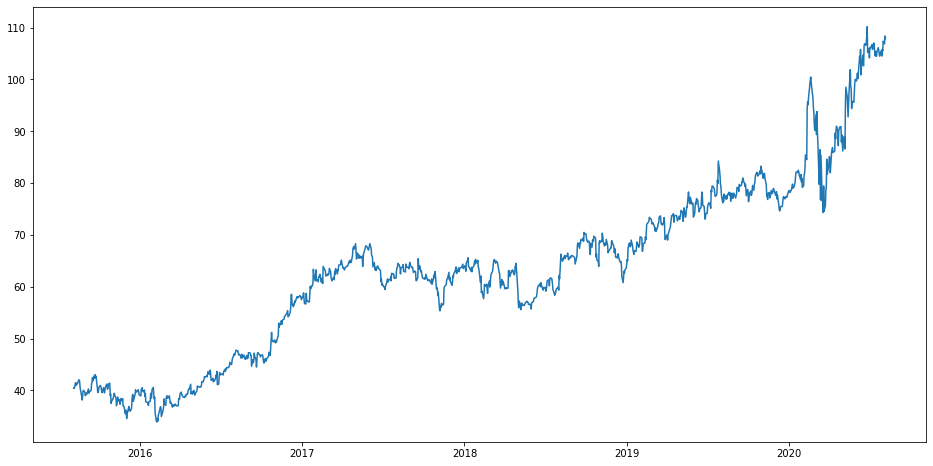

In [ ]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

##Split

In [ ]:
#creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

In [ ]:
# NOTE: I did not use random splitting since that will destroy the time component. 
# Validation starts 7/1/20 the new quarter and the day afetr the reporting
# splitting into train and validation
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#dataset = new_data.values

train = new_data[:1234]
valid = new_data[1234:]

dataset = train.values

valid.head()

,Close
Date,
2020-07-01,106.13
2020-07-02,106.01
2020-07-06,106.78
2020-07-07,105.8
2020-07-08,106.61


In [ ]:
train.tail()

,Close
Date,
2020-06-24,108.43
2020-06-25,110.19
2020-06-26,105.2
2020-06-29,105.96
2020-06-30,104.15


In [ ]:
valid.tail()

,Close
Date,
2020-07-30,105.48
2020-07-31,107.38
2020-08-03,106.88
2020-08-04,108.39
2020-08-05,107.9


In [ ]:
#shapes of the original set
print('\n Shape of the original set:')
print(new_data.shape)

# shapes of training set
print('\n Shape of training set:')
print(train.shape)

# shapes of validation set
print('\n Shape of validation set:')
print(valid.shape)


 Shape of the original set:
(1259, 1)

 Shape of training set:
(1234, 1)

 Shape of validation set:
(25, 1)


##LSTM

In [ ]:

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [ ]:
x_train.shape

(1174, 60, 1)

In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
s=X_test.shape
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

1174/1174 - 26s - loss: 0.0023


In [ ]:
inputs.shape

(85, 1)

In [ ]:
s

(25, 60, 1)

##Plotting

Plotting: 
- Closing Price Years 1-4 (Training) (Blue)
- Closing Price Year 5 Actual (Current Year) (Orange)
- Closing Price Year 5 Prediction (Current Year) (Green)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


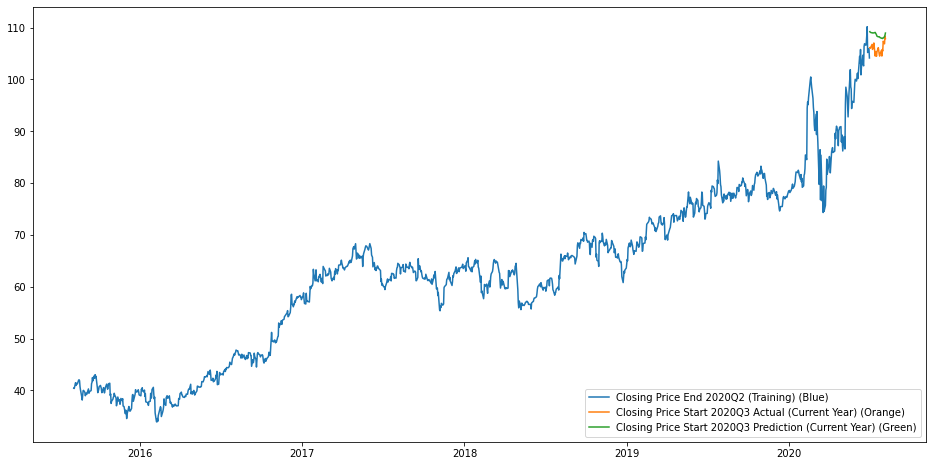

In [ ]:

valid['Predictions'] = closing_price

import matplotlib.patches as mpatches

plt.figure(figsize=(16,8))

#blue_patch = mpatches.Patch(color='blue', label='Closing Price Years 1-4 (Training) (Blue)')
#orange_patch = mpatches.Patch(color='orange', label='Closing Price Year 5 Actual (Current Year) (Orange)')
#green_patch = mpatches.Patch(color='green', label='Closing Price Year 5 Prediction (Current Year) (Green)')
#plt.legend(handles=[blue_patch,orange_patch,green_patch])

line1 = plt.plot(train['Close'],label='Closing Price End 2020Q2 (Training) (Blue)')
line2 = plt.plot(valid[['Close']],label='Closing Price Start 2020Q3 Actual (Current Year) (Orange)')
line3 = plt.plot(valid['Predictions'],label='Closing Price Start 2020Q3 Prediction (Current Year) (Green)')

plt.legend( loc='lower right')

plt.show()


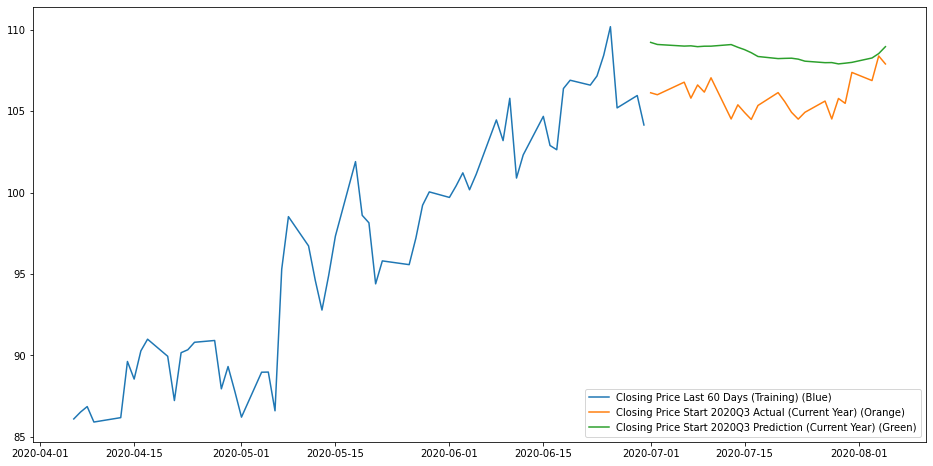

In [ ]:
show = train[-60:]


plt.figure(figsize=(16,8))

line1 = plt.plot(show['Close'],label='Closing Price Last 60 Days (Training) (Blue)')
line2 = plt.plot(valid[['Close']],label='Closing Price Start 2020Q3 Actual (Current Year) (Orange)')
line3 = plt.plot(valid['Predictions'],label='Closing Price Start 2020Q3 Prediction (Current Year) (Green)')

plt.legend( loc='lower right')

plt.show()

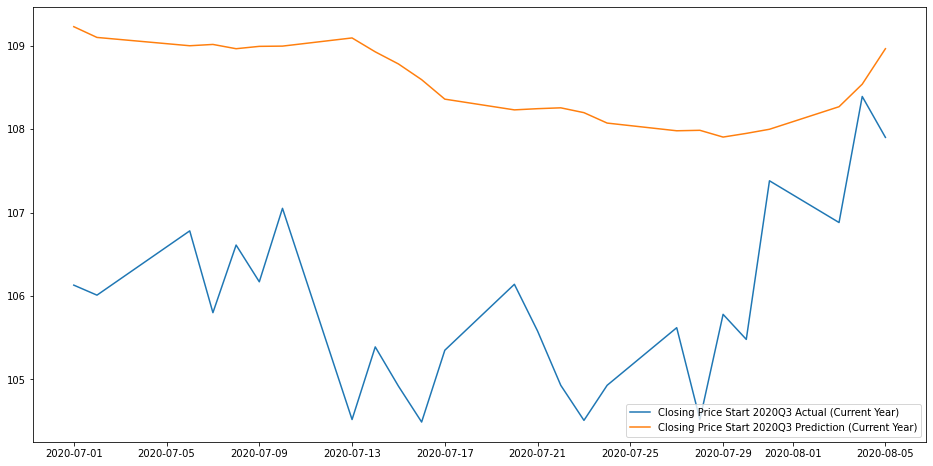

In [ ]:
plt.figure(figsize=(16,8))


line2 = plt.plot(valid[['Close']],label='Closing Price Start 2020Q3 Actual (Current Year)')
line3 = plt.plot(valid['Predictions'],label='Closing Price Start 2020Q3 Prediction (Current Year)')

plt.legend( loc='lower right')

plt.show()

##Predictions

In [ ]:
#Where is the highest closing price in the predicted zone
valid[['Predictions']].max()

Predictions    109.226028
dtype: float32

In [ ]:
#date of highest prediction
valid[['Predictions']].idxmax()

Predictions   2020-07-01
dtype: datetime64[ns]

In [ ]:
#valid.tail()

In [ ]:
#########
valid.to_csv('/content/drive/My Drive/AI/Datasets/Stock_Project/Predictions/prediction_TMUS.csv')

In [ ]:
#date +/- week 
#valid_sub = valid.loc['2020-07-27':'2020-08-05']
#valid_sub

In [ ]:
print(valid.loc['2020-07-01'])

Close           106.13
Predictions    109.226
Name: 2020-07-01 00:00:00, dtype: object


In [ ]:
print(valid[valid.index=='2020-07-01'])

             Close  Predictions
Date                           
2020-07-01  106.13   109.226028


In [ ]:
print(valid[valid.Predictions == valid.Predictions.max()]) 

             Close  Predictions
Date                           
2020-07-01  106.13   109.226028


In [ ]:
res = valid[['Predictions']]
res.columns = ['Value']
res = res.sort_values(by='Value', ascending=False)
res = res[:1]

res2 = train
res2.columns = ['Value']
res2 = res2[-1:]

#res.head()
#res2.head()
result = res2.append(res)
result

,Value
Date,
2020-06-30,104.15
2020-07-01,109.226


In [ ]:
selldate = str(valid[['Predictions']].idxmax()[0])

In [ ]:
###############
plres6 = valid[['Predictions']]
plres6 = plres6.loc[:selldate]
plres6.columns =  ['TMUS']
plres6.tail()

,TMUS
Date,
2020-07-01,109.226028


In [ ]:
bvalue = result['Value'][0]

In [ ]:
#############
roil = []
for index, row in plres6.iterrows():
     roil.append( ((row['TMUS']-	bvalue)/bvalue)*100)



In [ ]:
plres6['TMUS_ROI (%)'] = roil

In [ ]:
plres6.tail()

,TMUS,TMUS_ROI (%)
Date,,
2020-07-01,109.226028,4.873765


In [ ]:
plres6.to_csv('/content/drive/My Drive/AI/Datasets/Stock_Project/Predictions/sell_TMUS.csv')

##End Valuation

In [ ]:
#######
orig.loc[6]

Investment     T-Mobile US
Shares/Par       3,684,370
Value ($)      383,727,136
% of Top 10          8.19%
Name: 6, dtype: object

In [ ]:
bdate = str(result.index[0]) 
bdate = bdate.split(' ')
bdate = bdate[0]
bdate

'2020-06-30'

In [ ]:
sdate = str(result.index[1]) 
sdate = sdate.split(' ')
sdate = sdate[0]
sdate

'2020-07-01'

In [ ]:
ahigh = valid[['Close']]
ahigh = ahigh.sort_values(by='Close', ascending=False)
ahigh = ahigh[:1]
#ahigh

evalue = ahigh['Close'][0]
pp = round(evalue-bvalue,2)
ro = pp/bvalue
rop = ro*100
rop = round(rop,2)
rop

4.07

In [ ]:

bsvalue = round(result.Value[0],2)

esvalue = round(result.Value[1],2)
pps = round(esvalue-bsvalue,2)
roi = pps/bsvalue
roip = roi*100
roip =round(roip,2)



print('Begin Date: '+str(bdate))
print('Begin Value/Share: '+str(bsvalue))
print('Sell Date: '+str(sdate))
print('Sell Value/Share: '+str(esvalue))
print('Profit per Share: '+str(pps))
print('Return on Investment: '+str(roip)+'%')
print('\n')

###############
shares = locale.atoi(orig.loc[6]['Shares/Par'])
bvalue = locale.atoi(orig.loc[6]['Value ($)'])
svalue = round(shares * esvalue,2)
profit = round(svalue - bvalue,2)
print('Shares: '+str(shares))
print('Begin Value: '+str(bvalue))
print('Sell Value: '+str(svalue))
print('Total Profit: '+str(profit))
print('\n')

print('Actual Max Return on Investment: '+str(rop)+'%')


Begin Date: 2020-06-30
Begin Value/Share: 104.15
Sell Date: 2020-07-01
Sell Value/Share: 109.23
Profit per Share: 5.08
Return on Investment: 4.88%


Shares: 3684370
Begin Value: 383727136
Sell Value: 402443735.1
Total Profit: 18716599.1


Actual Max Return on Investment: 4.07%


##Update Final Table

In [ ]:
##########
final['Shares'].loc[6] = shares
final['Begin Date'].loc[6] = bdate
final['Begin Share Value'].loc[6] = bsvalue
final['Sell Date'].loc[6] = sdate
final['Sell Share Value'].loc[6] = esvalue
final['Profit Per Share'].loc[6] = pps
final['Begin Value'].loc[6] = bvalue
final['Sell Value'].loc[6] = svalue
final['Total Profit'].loc[6] = profit
final['ROI (%)'].loc[6] = roip
final['Actual Max ROI (%)'].loc[6] = rop

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
final

,Investment,Shares,Begin Date,Begin Share Value,Sell Date,Sell Share Value,Profit Per Share,Begin Value,Sell Value,Total Profit,ROI (%),Actual Max ROI (%)
0,Amazon,411600.0,2020-06-30,2758.82,2020-07-16,3072.70,313.88,1.135530e+09,1.264723e+09,1.291930e+08,11.38,16.17
1,Facebook,2132800.0,2020-06-30,227.07,2020-08-05,247.52,20.45,4.842949e+08,5.279107e+08,4.361576e+07,9.01,11.71
2,"American Tower, REIT",1840700.0,2020-06-30,258.54,2020-07-13,263.69,5.15,4.758946e+08,4.853742e+08,9.479605e+06,1.99,4.93
3,"Alibaba Group Holding, ADR",2021134.0,2020-06-30,215.70,2020-08-05,247.96,32.26,4.359586e+08,5.011604e+08,6.520178e+07,14.96,22.81
4,Netflix,886480.0,2020-06-30,455.04,2020-07-17,513.53,58.49,4.033839e+08,4.552341e+08,5.185022e+07,12.85,20.59
5,"Crown Castle International, REIT",2364468.0,2020-06-30,167.35,2020-07-13,171.53,4.18,3.956937e+08,4.055772e+08,9.883476e+06,2.50,4.15
6,T-Mobile US,3684370.0,2020-06-30,104.15,2020-07-01,109.23,5.08,3.837271e+08,4.024437e+08,1.871660e+07,4.88,4.07
7,PayPal Holdings,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Alphabet Class C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Tencent Holdings,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#PayPal Holdings (PYPL)

##Import

In [ ]:

#read the file
df = pd.read_csv('/content/drive/My Drive/AI/Datasets/Stock_Project/PayPal_Holdings/PYPL.csv')

#print the head
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-08-06,39.630001,39.740002,38.549999,38.849998,38.849998,7324100
1,2015-08-07,39.040001,39.230000,38.599998,39.130001,39.130001,8331300
2,2015-08-10,39.430000,39.689999,38.770000,39.049999,39.049999,7998900
3,2015-08-11,38.930000,39.279999,38.720001,38.849998,38.849998,8184000
4,2015-08-12,38.549999,38.580002,37.009998,38.189999,38.189999,21350600


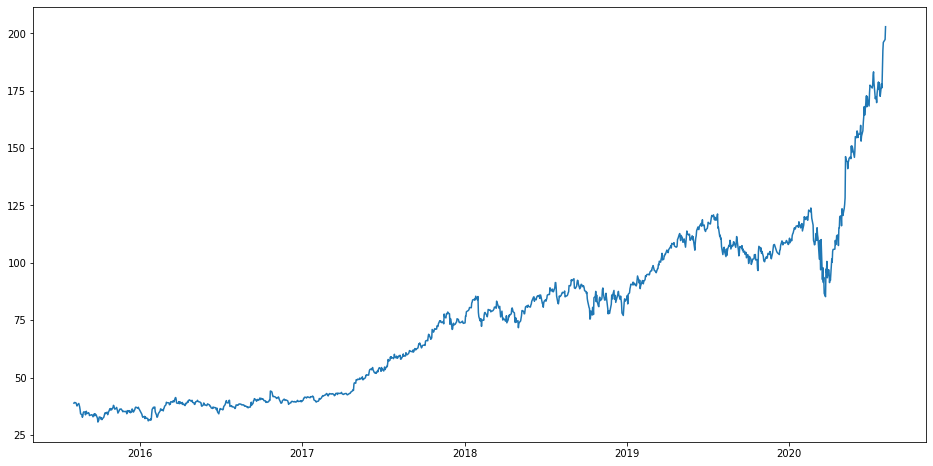

In [ ]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

##Split

In [ ]:
#creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

In [ ]:
# NOTE: I did not use random splitting since that will destroy the time component. 
# Validation starts 7/1/20 the new quarter and the day afetr the reporting
# splitting into train and validation
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#dataset = new_data.values

train = new_data[:1234]
valid = new_data[1234:]

dataset = train.values

valid.head()

,Close
Date,
2020-07-01,177.43
2020-07-02,177.21
2020-07-06,176.18
2020-07-07,177.28
2020-07-08,181.57


In [ ]:
train.tail()

,Close
Date,
2020-06-24,168
2020-06-25,172.5
2020-06-26,170.87
2020-06-29,168.35
2020-06-30,174.23


In [ ]:
valid.tail()

,Close
Date,
2020-07-30,192.51
2020-07-31,196.07
2020-08-03,197.07
2020-08-04,197.33
2020-08-05,202.91


In [ ]:
#shapes of the original set
print('\n Shape of the original set:')
print(new_data.shape)

# shapes of training set
print('\n Shape of training set:')
print(train.shape)

# shapes of validation set
print('\n Shape of validation set:')
print(valid.shape)


 Shape of the original set:
(1259, 1)

 Shape of training set:
(1234, 1)

 Shape of validation set:
(25, 1)


##LSTM

In [ ]:

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [ ]:
x_train.shape

(1174, 60, 1)

In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
s=X_test.shape
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

1174/1174 - 27s - loss: 0.0020


In [ ]:
inputs.shape

(85, 1)

In [ ]:
s

(25, 60, 1)

##Plotting

Plotting: 
- Closing Price Years 1-4 (Training) (Blue)
- Closing Price Year 5 Actual (Current Year) (Orange)
- Closing Price Year 5 Prediction (Current Year) (Green)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


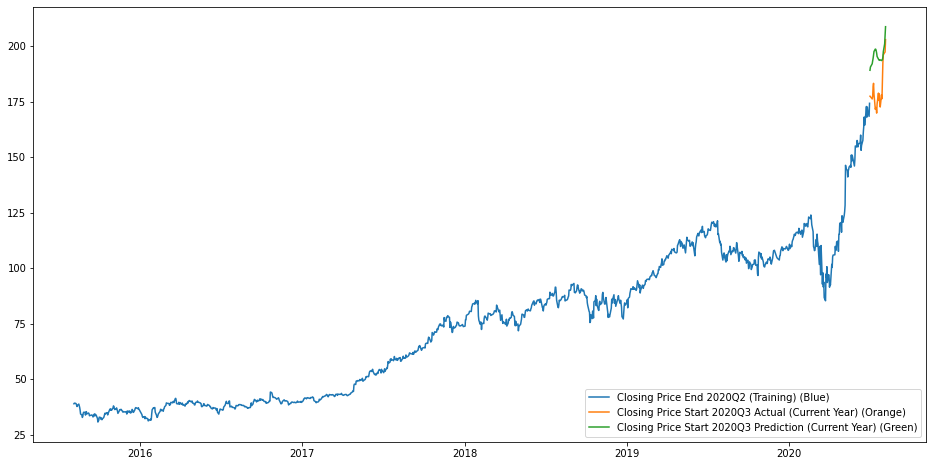

In [ ]:

valid['Predictions'] = closing_price

import matplotlib.patches as mpatches

plt.figure(figsize=(16,8))

#blue_patch = mpatches.Patch(color='blue', label='Closing Price Years 1-4 (Training) (Blue)')
#orange_patch = mpatches.Patch(color='orange', label='Closing Price Year 5 Actual (Current Year) (Orange)')
#green_patch = mpatches.Patch(color='green', label='Closing Price Year 5 Prediction (Current Year) (Green)')
#plt.legend(handles=[blue_patch,orange_patch,green_patch])

line1 = plt.plot(train['Close'],label='Closing Price End 2020Q2 (Training) (Blue)')
line2 = plt.plot(valid[['Close']],label='Closing Price Start 2020Q3 Actual (Current Year) (Orange)')
line3 = plt.plot(valid['Predictions'],label='Closing Price Start 2020Q3 Prediction (Current Year) (Green)')

plt.legend( loc='lower right')

plt.show()


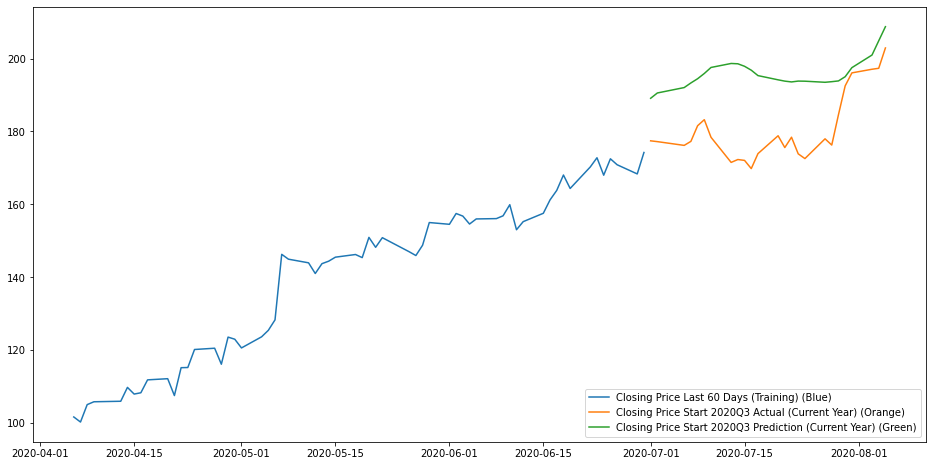

In [ ]:
show = train[-60:]


plt.figure(figsize=(16,8))

line1 = plt.plot(show['Close'],label='Closing Price Last 60 Days (Training) (Blue)')
line2 = plt.plot(valid[['Close']],label='Closing Price Start 2020Q3 Actual (Current Year) (Orange)')
line3 = plt.plot(valid['Predictions'],label='Closing Price Start 2020Q3 Prediction (Current Year) (Green)')

plt.legend( loc='lower right')

plt.show()

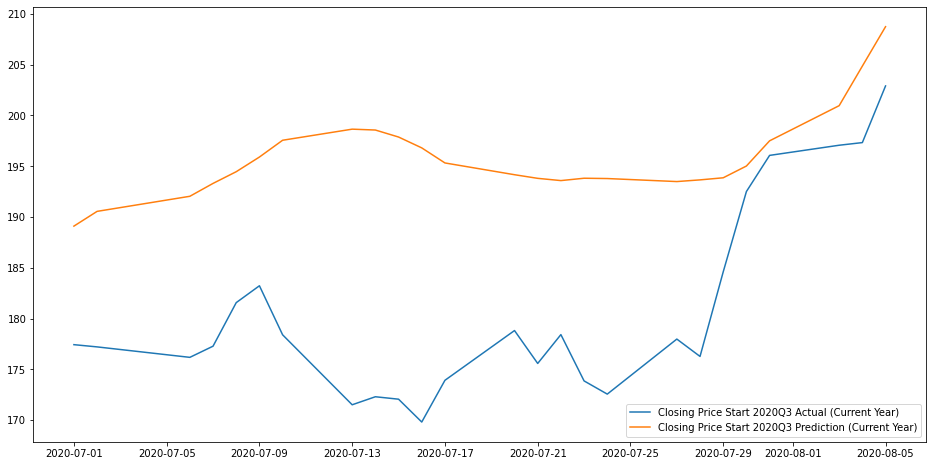

In [ ]:
plt.figure(figsize=(16,8))


line2 = plt.plot(valid[['Close']],label='Closing Price Start 2020Q3 Actual (Current Year)')
line3 = plt.plot(valid['Predictions'],label='Closing Price Start 2020Q3 Prediction (Current Year)')

plt.legend( loc='lower right')

plt.show()

##Predictions

In [ ]:
#Where is the highest closing price in the predicted zone
valid[['Predictions']].max()

Predictions    208.745407
dtype: float32

In [ ]:
#date of highest prediction
valid[['Predictions']].idxmax()

Predictions   2020-08-05
dtype: datetime64[ns]

In [ ]:
#valid.tail()

In [ ]:
#########
valid.to_csv('/content/drive/My Drive/AI/Datasets/Stock_Project/Predictions/prediction_PYPL.csv')

In [ ]:
#date +/- week 
#valid_sub = valid.loc['2020-07-27':'2020-08-05']
#valid_sub

In [ ]:
print(valid.loc['2020-07-01'])

Close           177.43
Predictions    189.104
Name: 2020-07-01 00:00:00, dtype: object


In [ ]:
print(valid[valid.index=='2020-07-01'])

             Close  Predictions
Date                           
2020-07-01  177.43   189.104248


In [ ]:
print(valid[valid.Predictions == valid.Predictions.max()]) 

             Close  Predictions
Date                           
2020-08-05  202.91   208.745407


In [ ]:
res = valid[['Predictions']]
res.columns = ['Value']
res = res.sort_values(by='Value', ascending=False)
res = res[:1]

res2 = train
res2.columns = ['Value']
res2 = res2[-1:]

#res.head()
#res2.head()
result = res2.append(res)
result

,Value
Date,
2020-06-30,174.23
2020-08-05,208.745


In [ ]:
selldate = str(valid[['Predictions']].idxmax()[0])

In [ ]:
###############
plres7 = valid[['Predictions']]
plres7 = plres7.loc[:selldate]
plres7.columns =  ['PYPL']
plres7.tail()

,PYPL
Date,
2020-07-30,195.022568
2020-07-31,197.504700
2020-08-03,200.967163
2020-08-04,204.863968
2020-08-05,208.745407


In [ ]:
bvalue = result['Value'][0]

In [ ]:
#############
roil = []
for index, row in plres7.iterrows():
     roil.append( ((row['PYPL']-	bvalue)/bvalue)*100)



In [ ]:
plres7['PYPL_ROI (%)'] = roil

In [ ]:
plres7.tail()

,PYPL,PYPL_ROI (%)
Date,,
2020-07-30,195.022568,11.933979
2020-07-31,197.504700,13.358609
2020-08-03,200.967163,15.345904
2020-08-04,204.863968,17.582490
2020-08-05,208.745407,19.810258


In [ ]:
plres7.to_csv('/content/drive/My Drive/AI/Datasets/Stock_Project/Predictions/sell_PYPL.csv')

##End Valuation

In [ ]:
#######
orig.loc[7]

Investment     PayPal Holdings
Shares/Par           1,900,400
Value ($)          331,106,692
% of Top 10              7.06%
Name: 7, dtype: object

In [ ]:
bdate = str(result.index[0]) 
bdate = bdate.split(' ')
bdate = bdate[0]
bdate

'2020-06-30'

In [ ]:
sdate = str(result.index[1]) 
sdate = sdate.split(' ')
sdate = sdate[0]
sdate

'2020-08-05'

In [ ]:
ahigh = valid[['Close']]
ahigh = ahigh.sort_values(by='Close', ascending=False)
ahigh = ahigh[:1]
#ahigh

evalue = ahigh['Close'][0]
pp = round(evalue-bvalue,2)
ro = pp/bvalue
rop = ro*100
rop = round(rop,2)
rop

16.46

In [ ]:

bsvalue = round(result.Value[0],2)

esvalue = round(result.Value[1],2)
pps = round(esvalue-bsvalue,2)
roi = pps/bsvalue
roip = roi*100
roip =round(roip,2)



print('Begin Date: '+str(bdate))
print('Begin Value/Share: '+str(bsvalue))
print('Sell Date: '+str(sdate))
print('Sell Value/Share: '+str(esvalue))
print('Profit per Share: '+str(pps))
print('Return on Investment: '+str(roip)+'%')
print('\n')

###############
shares = locale.atoi(orig.loc[7]['Shares/Par'])
bvalue = locale.atoi(orig.loc[7]['Value ($)'])
svalue = round(shares * esvalue,2)
profit = round(svalue - bvalue,2)
print('Shares: '+str(shares))
print('Begin Value: '+str(bvalue))
print('Sell Value: '+str(svalue))
print('Total Profit: '+str(profit))
print('\n')

print('Actual Max Return on Investment: '+str(rop)+'%')


Begin Date: 2020-06-30
Begin Value/Share: 174.23
Sell Date: 2020-08-05
Sell Value/Share: 208.75
Profit per Share: 34.52
Return on Investment: 19.81%


Shares: 1900400
Begin Value: 331106692
Sell Value: 396708500.0
Total Profit: 65601808.0


Actual Max Return on Investment: 16.46%


##Update Final Table

In [ ]:
##########
final['Shares'].loc[7] = shares
final['Begin Date'].loc[7] = bdate
final['Begin Share Value'].loc[7] = bsvalue
final['Sell Date'].loc[7] = sdate
final['Sell Share Value'].loc[7] = esvalue
final['Profit Per Share'].loc[7] = pps
final['Begin Value'].loc[7] = bvalue
final['Sell Value'].loc[7] = svalue
final['Total Profit'].loc[7] = profit
final['ROI (%)'].loc[7] = roip
final['Actual Max ROI (%)'].loc[7] = rop

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
final

,Investment,Shares,Begin Date,Begin Share Value,Sell Date,Sell Share Value,Profit Per Share,Begin Value,Sell Value,Total Profit,ROI (%),Actual Max ROI (%)
0,Amazon,411600.0,2020-06-30,2758.82,2020-07-16,3072.70,313.88,1.135530e+09,1.264723e+09,1.291930e+08,11.38,16.17
1,Facebook,2132800.0,2020-06-30,227.07,2020-08-05,247.52,20.45,4.842949e+08,5.279107e+08,4.361576e+07,9.01,11.71
2,"American Tower, REIT",1840700.0,2020-06-30,258.54,2020-07-13,263.69,5.15,4.758946e+08,4.853742e+08,9.479605e+06,1.99,4.93
3,"Alibaba Group Holding, ADR",2021134.0,2020-06-30,215.70,2020-08-05,247.96,32.26,4.359586e+08,5.011604e+08,6.520178e+07,14.96,22.81
4,Netflix,886480.0,2020-06-30,455.04,2020-07-17,513.53,58.49,4.033839e+08,4.552341e+08,5.185022e+07,12.85,20.59
5,"Crown Castle International, REIT",2364468.0,2020-06-30,167.35,2020-07-13,171.53,4.18,3.956937e+08,4.055772e+08,9.883476e+06,2.50,4.15
6,T-Mobile US,3684370.0,2020-06-30,104.15,2020-07-01,109.23,5.08,3.837271e+08,4.024437e+08,1.871660e+07,4.88,4.07
7,PayPal Holdings,1900400.0,2020-06-30,174.23,2020-08-05,208.75,34.52,3.311067e+08,3.967085e+08,6.560181e+07,19.81,16.46
8,Alphabet Class C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Tencent Holdings,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Alphabet Class C (GOOG)

##Import

In [ ]:


#read the file
df = pd.read_csv('/content/drive/My Drive/AI/Datasets/Stock_Project/Alphabet_Class_C_(GOOG)/GOOG.csv')

#print the head
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-08-06,645.000000,645.379028,632.250000,642.679993,642.679993,1572600
1,2015-08-07,640.229980,642.679993,629.710022,635.299988,635.299988,1403900
2,2015-08-10,639.479980,643.440002,631.249023,633.729980,633.729980,1809200
3,2015-08-11,669.200012,674.900024,654.270020,660.780029,660.780029,5029200
4,2015-08-12,663.080017,665.000000,652.289978,659.559998,659.559998,2936700


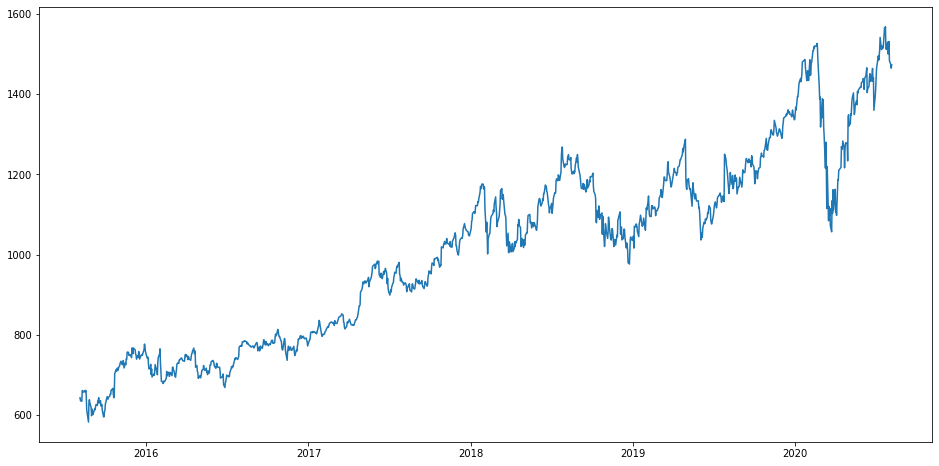

In [ ]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

##Split

In [ ]:
#creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

In [ ]:
# NOTE: I did not use random splitting since that will destroy the time component. 
# Validation starts 7/1/20 the new quarter and the day afetr the reporting
# splitting into train and validation
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#dataset = new_data.values

train = new_data[:1234]
valid = new_data[1234:]

dataset = train.values

valid.head()

,Close
Date,
2020-07-01,1438.04
2020-07-02,1464.7
2020-07-06,1495.7
2020-07-07,1485.18
2020-07-08,1496


In [ ]:
train.tail()

,Close
Date,
2020-06-24,1431.97
2020-06-25,1441.33
2020-06-26,1359.9
2020-06-29,1394.97
2020-06-30,1413.61


In [ ]:
valid.tail()

,Close
Date,
2020-07-30,1531.45
2020-07-31,1482.96
2020-08-03,1474.45
2020-08-04,1464.97
2020-08-05,1473.61


In [ ]:
#shapes of the original set
print('\n Shape of the original set:')
print(new_data.shape)

# shapes of training set
print('\n Shape of training set:')
print(train.shape)

# shapes of validation set
print('\n Shape of validation set:')
print(valid.shape)


 Shape of the original set:
(1259, 1)

 Shape of training set:
(1234, 1)

 Shape of validation set:
(25, 1)


##LSTM

In [ ]:

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [ ]:
x_train.shape

(1174, 60, 1)

In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
s=X_test.shape
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

1174/1174 - 27s - loss: 0.0029


In [ ]:
inputs.shape

(85, 1)

In [ ]:
s

(25, 60, 1)

##Plotting

Plotting: 
- Closing Price Years 1-4 (Training) (Blue)
- Closing Price Year 5 Actual (Current Year) (Orange)
- Closing Price Year 5 Prediction (Current Year) (Green)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


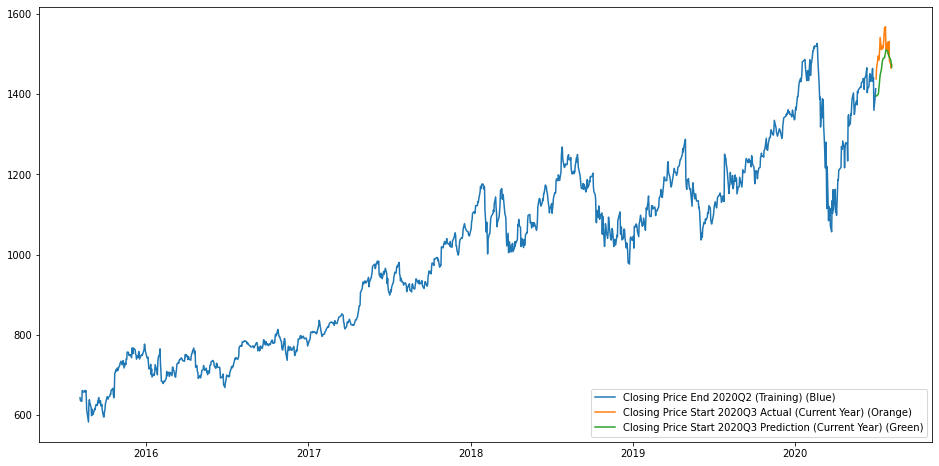

In [ ]:

valid['Predictions'] = closing_price

import matplotlib.patches as mpatches

plt.figure(figsize=(16,8))

#blue_patch = mpatches.Patch(color='blue', label='Closing Price Years 1-4 (Training) (Blue)')
#orange_patch = mpatches.Patch(color='orange', label='Closing Price Year 5 Actual (Current Year) (Orange)')
#green_patch = mpatches.Patch(color='green', label='Closing Price Year 5 Prediction (Current Year) (Green)')
#plt.legend(handles=[blue_patch,orange_patch,green_patch])

line1 = plt.plot(train['Close'],label='Closing Price End 2020Q2 (Training) (Blue)')
line2 = plt.plot(valid[['Close']],label='Closing Price Start 2020Q3 Actual (Current Year) (Orange)')
line3 = plt.plot(valid['Predictions'],label='Closing Price Start 2020Q3 Prediction (Current Year) (Green)')

plt.legend( loc='lower right')

plt.show()


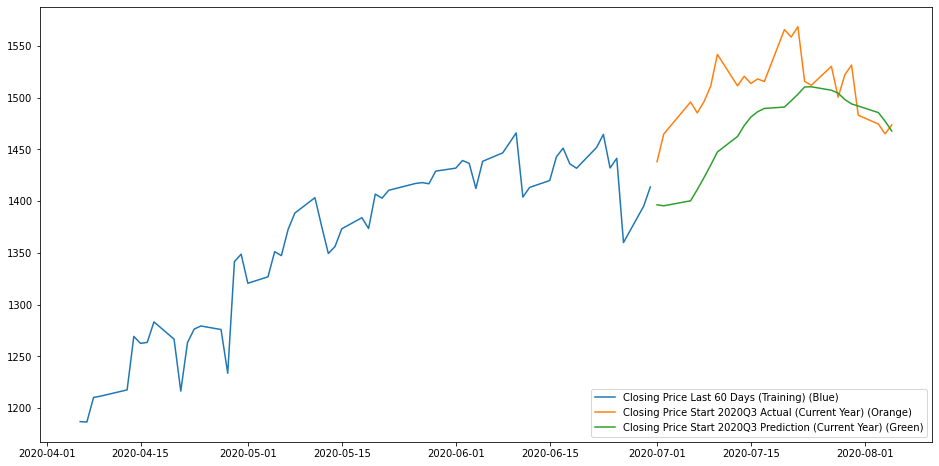

In [ ]:
show = train[-60:]


plt.figure(figsize=(16,8))

line1 = plt.plot(show['Close'],label='Closing Price Last 60 Days (Training) (Blue)')
line2 = plt.plot(valid[['Close']],label='Closing Price Start 2020Q3 Actual (Current Year) (Orange)')
line3 = plt.plot(valid['Predictions'],label='Closing Price Start 2020Q3 Prediction (Current Year) (Green)')

plt.legend( loc='lower right')

plt.show()

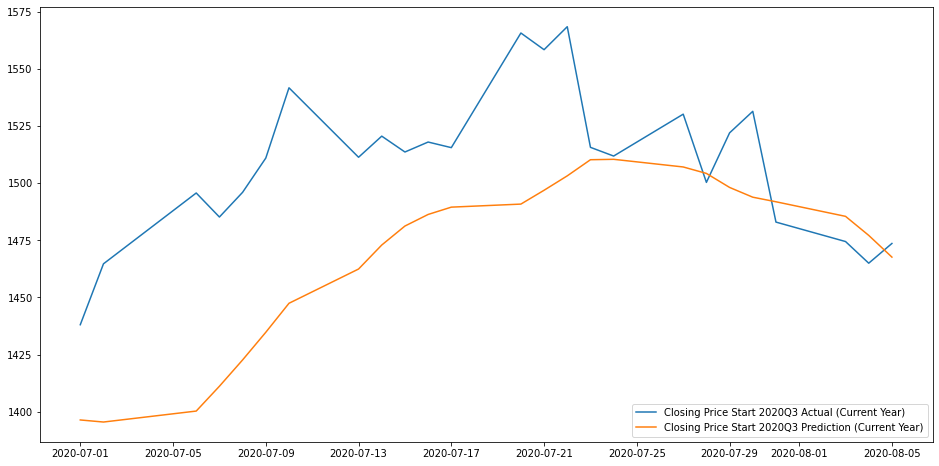

In [ ]:
plt.figure(figsize=(16,8))


line2 = plt.plot(valid[['Close']],label='Closing Price Start 2020Q3 Actual (Current Year)')
line3 = plt.plot(valid['Predictions'],label='Closing Price Start 2020Q3 Prediction (Current Year)')

plt.legend( loc='lower right')

plt.show()

##Predictions

In [ ]:
#Where is the highest closing price in the predicted zone
valid[['Predictions']].max()

Predictions    1510.439453
dtype: float32

In [ ]:
#date of highest prediction
valid[['Predictions']].idxmax()

Predictions   2020-07-24
dtype: datetime64[ns]

In [ ]:
#valid.tail()

In [ ]:
#########
valid.to_csv('/content/drive/My Drive/AI/Datasets/Stock_Project/Predictions/prediction_GOOG.csv')

In [ ]:
#date +/- week 
#valid_sub = valid.loc['2020-07-27':'2020-08-05']
#valid_sub

In [ ]:
print(valid.loc['2020-07-01'])

Close          1438.04
Predictions    1396.36
Name: 2020-07-01 00:00:00, dtype: object


In [ ]:
print(valid[valid.index=='2020-07-01'])

              Close  Predictions
Date                            
2020-07-01  1438.04  1396.358643


In [ ]:
print(valid[valid.Predictions == valid.Predictions.max()]) 

              Close  Predictions
Date                            
2020-07-24  1511.87  1510.439453


In [ ]:
res = valid[['Predictions']]
res.columns = ['Value']
res = res.sort_values(by='Value', ascending=False)
res = res[:1]

res2 = train
res2.columns = ['Value']
res2 = res2[-1:]

#res.head()
#res2.head()
result = res2.append(res)
result

,Value
Date,
2020-06-30,1413.61
2020-07-24,1510.44


In [ ]:
selldate = str(valid[['Predictions']].idxmax()[0])

In [ ]:
###############
plres8 = valid[['Predictions']]
plres8 = plres8.loc[:selldate]
plres8.columns =  ['GOOG']
plres8.tail()

,GOOG
Date,
2020-07-20,1490.840210
2020-07-21,1496.895996
2020-07-22,1503.203857
2020-07-23,1510.259155
2020-07-24,1510.439453


In [ ]:
bvalue = result['Value'][0]

In [ ]:
#############
roil = []
for index, row in plres8.iterrows():
     roil.append( ((row['GOOG']-	bvalue)/bvalue)*100)



In [ ]:
plres8['GOOG_ROI (%)'] = roil

In [ ]:
plres8.tail()

,GOOG,GOOG_ROI (%)
Date,,
2020-07-20,1490.840210,5.463333
2020-07-21,1496.895996,5.891725
2020-07-22,1503.203857,6.337948
2020-07-23,1510.259155,6.837046
2020-07-24,1510.439453,6.849801


In [ ]:
plres8.to_csv('/content/drive/My Drive/AI/Datasets/Stock_Project/Predictions/sell_GOOG.csv')

##End Valuation

In [ ]:
#######
orig.loc[8]

Investment     Alphabet Class C
Shares/Par              227,703
Value ($)           321,883,238
% of Top 10               6.87%
Name: 8, dtype: object

In [ ]:
bdate = str(result.index[0]) 
bdate = bdate.split(' ')
bdate = bdate[0]
bdate

'2020-06-30'

In [ ]:
sdate = str(result.index[1]) 
sdate = sdate.split(' ')
sdate = sdate[0]
sdate

'2020-07-24'

In [ ]:
ahigh = valid[['Close']]
ahigh = ahigh.sort_values(by='Close', ascending=False)
ahigh = ahigh[:1]
#ahigh

evalue = ahigh['Close'][0]
pp = round(evalue-bvalue,2)
ro = pp/bvalue
rop = ro*100
rop = round(rop,2)
rop

10.96

In [ ]:

bsvalue = round(result.Value[0],2)

esvalue = round(result.Value[1],2)
pps = round(esvalue-bsvalue,2)
roi = pps/bsvalue
roip = roi*100
roip =round(roip,2)



print('Begin Date: '+str(bdate))
print('Begin Value/Share: '+str(bsvalue))
print('Sell Date: '+str(sdate))
print('Sell Value/Share: '+str(esvalue))
print('Profit per Share: '+str(pps))
print('Return on Investment: '+str(roip)+'%')
print('\n')

###############
shares = locale.atoi(orig.loc[8]['Shares/Par'])
bvalue = locale.atoi(orig.loc[8]['Value ($)'])
svalue = round(shares * esvalue,2)
profit = round(svalue - bvalue,2)
print('Shares: '+str(shares))
print('Begin Value: '+str(bvalue))
print('Sell Value: '+str(svalue))
print('Total Profit: '+str(profit))
print('\n')

print('Actual Max Return on Investment: '+str(rop)+'%')


Begin Date: 2020-06-30
Begin Value/Share: 1413.61
Sell Date: 2020-07-24
Sell Value/Share: 1510.44
Profit per Share: 96.83
Return on Investment: 6.85%


Shares: 227703
Begin Value: 321883238
Sell Value: 343931719.32
Total Profit: 22048481.32


Actual Max Return on Investment: 10.96%


##Update Final Table

In [ ]:
##########
final['Shares'].loc[8] = shares
final['Begin Date'].loc[8] = bdate
final['Begin Share Value'].loc[8] = bsvalue
final['Sell Date'].loc[8] = sdate
final['Sell Share Value'].loc[8] = esvalue
final['Profit Per Share'].loc[8] = pps
final['Begin Value'].loc[8] = bvalue
final['Sell Value'].loc[8] = svalue
final['Total Profit'].loc[8] = profit
final['ROI (%)'].loc[8] = roip
final['Actual Max ROI (%)'].loc[8] = rop

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
final

,Investment,Shares,Begin Date,Begin Share Value,Sell Date,Sell Share Value,Profit Per Share,Begin Value,Sell Value,Total Profit,ROI (%),Actual Max ROI (%)
0,Amazon,411600.0,2020-06-30,2758.82,2020-07-16,3072.70,313.88,1.135530e+09,1.264723e+09,1.291930e+08,11.38,16.17
1,Facebook,2132800.0,2020-06-30,227.07,2020-08-05,247.52,20.45,4.842949e+08,5.279107e+08,4.361576e+07,9.01,11.71
2,"American Tower, REIT",1840700.0,2020-06-30,258.54,2020-07-13,263.69,5.15,4.758946e+08,4.853742e+08,9.479605e+06,1.99,4.93
3,"Alibaba Group Holding, ADR",2021134.0,2020-06-30,215.70,2020-08-05,247.96,32.26,4.359586e+08,5.011604e+08,6.520178e+07,14.96,22.81
4,Netflix,886480.0,2020-06-30,455.04,2020-07-17,513.53,58.49,4.033839e+08,4.552341e+08,5.185022e+07,12.85,20.59
5,"Crown Castle International, REIT",2364468.0,2020-06-30,167.35,2020-07-13,171.53,4.18,3.956937e+08,4.055772e+08,9.883476e+06,2.50,4.15
6,T-Mobile US,3684370.0,2020-06-30,104.15,2020-07-01,109.23,5.08,3.837271e+08,4.024437e+08,1.871660e+07,4.88,4.07
7,PayPal Holdings,1900400.0,2020-06-30,174.23,2020-08-05,208.75,34.52,3.311067e+08,3.967085e+08,6.560181e+07,19.81,16.46
8,Alphabet Class C,227703.0,2020-06-30,1413.61,2020-07-24,1510.44,96.83,3.218832e+08,3.439317e+08,2.204848e+07,6.85,10.96
9,Tencent Holdings,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Tencent Holdings (TCEHY)

##Import

In [ ]:

#read the file
df = pd.read_csv('/content/drive/My Drive/AI/Datasets/Stock_Project/Tencent Holdings/TCEHY.csv')

#print the head
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-08-06,18.180000,18.330000,17.950001,18.030001,17.799973,175900
1,2015-08-07,18.090000,18.250000,18.080000,18.190001,17.957933,184700
2,2015-08-10,18.260000,18.590000,18.260000,18.559999,18.323210,183400
3,2015-08-11,18.000000,18.100000,17.900000,18.070000,17.839464,178800
4,2015-08-12,17.559999,17.610001,17.160000,17.160000,16.941072,1207700


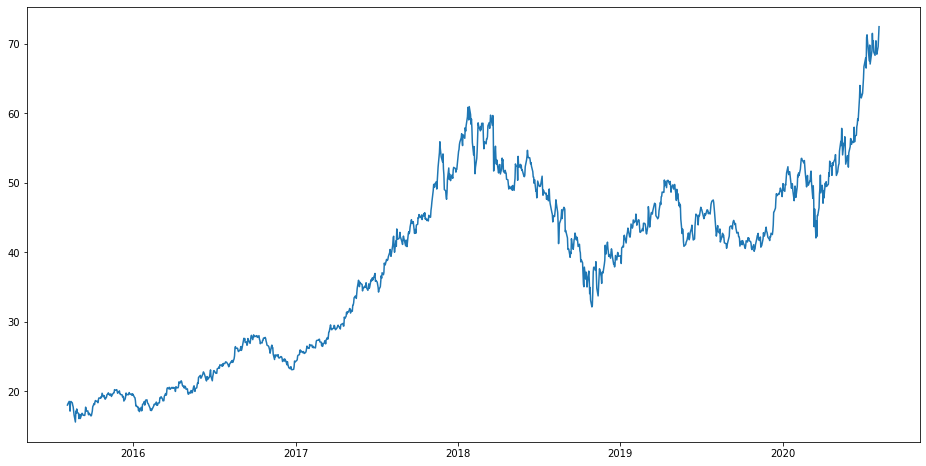

In [ ]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

##Split

In [ ]:
#creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

In [ ]:
# NOTE: I did not use random splitting since that will destroy the time component. 
# Validation starts 7/1/20 the new quarter and the day afetr the reporting
# splitting into train and validation
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#dataset = new_data.values

train = new_data[:1234]
valid = new_data[1234:]

dataset = train.values

valid.head()

,Close
Date,
2020-07-01,65.02
2020-07-02,66.69
2020-07-06,67.99
2020-07-07,66.5
2020-07-08,70.89


In [ ]:
train.tail()

,Close
Date,
2020-06-24,62.97
2020-06-25,62.72
2020-06-26,62.2
2020-06-29,62.87
2020-06-30,64


In [ ]:
valid.tail()

,Close
Date,
2020-07-30,69.06
2020-07-31,68.49
2020-08-03,69.6
2020-08-04,71.19
2020-08-05,72.45


In [ ]:
#shapes of the original set
print('\n Shape of the original set:')
print(new_data.shape)

# shapes of training set
print('\n Shape of training set:')
print(train.shape)

# shapes of validation set
print('\n Shape of validation set:')
print(valid.shape)


 Shape of the original set:
(1259, 1)

 Shape of training set:
(1234, 1)

 Shape of validation set:
(25, 1)


##LSTM

In [ ]:

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [ ]:
x_train.shape

(1174, 60, 1)

In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
s=X_test.shape
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

1174/1174 - 25s - loss: 0.0025


In [ ]:
inputs.shape

(85, 1)

In [ ]:
s

(25, 60, 1)

##Plotting

Plotting: 
- Closing Price Years 1-4 (Training) (Blue)
- Closing Price Year 5 Actual (Current Year) (Orange)
- Closing Price Year 5 Prediction (Current Year) (Green)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


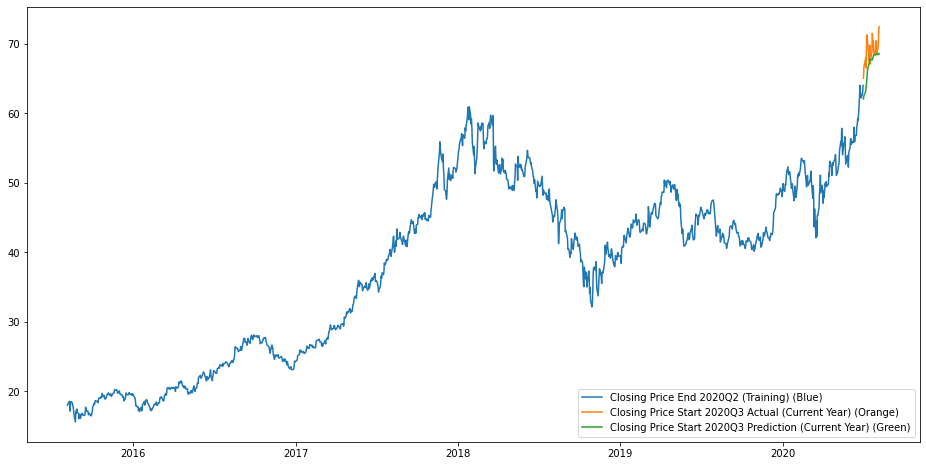

In [ ]:

valid['Predictions'] = closing_price

import matplotlib.patches as mpatches

plt.figure(figsize=(16,8))

#blue_patch = mpatches.Patch(color='blue', label='Closing Price Years 1-4 (Training) (Blue)')
#orange_patch = mpatches.Patch(color='orange', label='Closing Price Year 5 Actual (Current Year) (Orange)')
#green_patch = mpatches.Patch(color='green', label='Closing Price Year 5 Prediction (Current Year) (Green)')
#plt.legend(handles=[blue_patch,orange_patch,green_patch])

line1 = plt.plot(train['Close'],label='Closing Price End 2020Q2 (Training) (Blue)')
line2 = plt.plot(valid[['Close']],label='Closing Price Start 2020Q3 Actual (Current Year) (Orange)')
line3 = plt.plot(valid['Predictions'],label='Closing Price Start 2020Q3 Prediction (Current Year) (Green)')

plt.legend( loc='lower right')

plt.show()


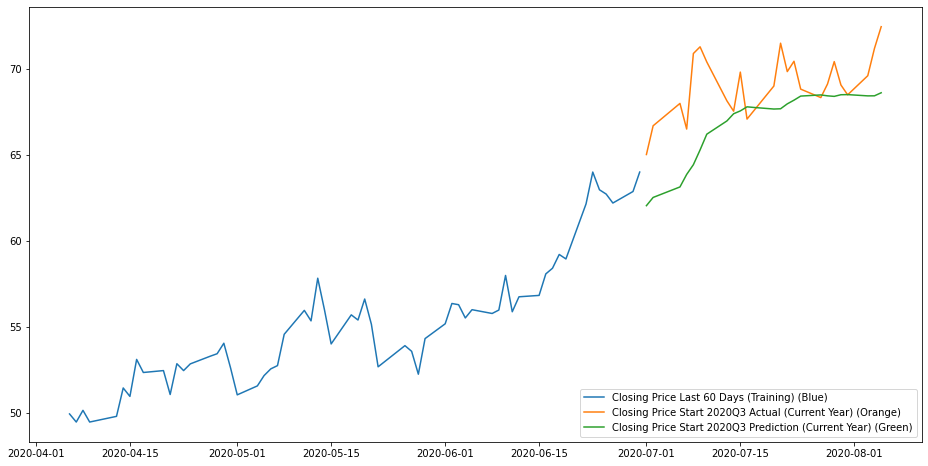

In [ ]:
show = train[-60:]


plt.figure(figsize=(16,8))

line1 = plt.plot(show['Close'],label='Closing Price Last 60 Days (Training) (Blue)')
line2 = plt.plot(valid[['Close']],label='Closing Price Start 2020Q3 Actual (Current Year) (Orange)')
line3 = plt.plot(valid['Predictions'],label='Closing Price Start 2020Q3 Prediction (Current Year) (Green)')

plt.legend( loc='lower right')

plt.show()

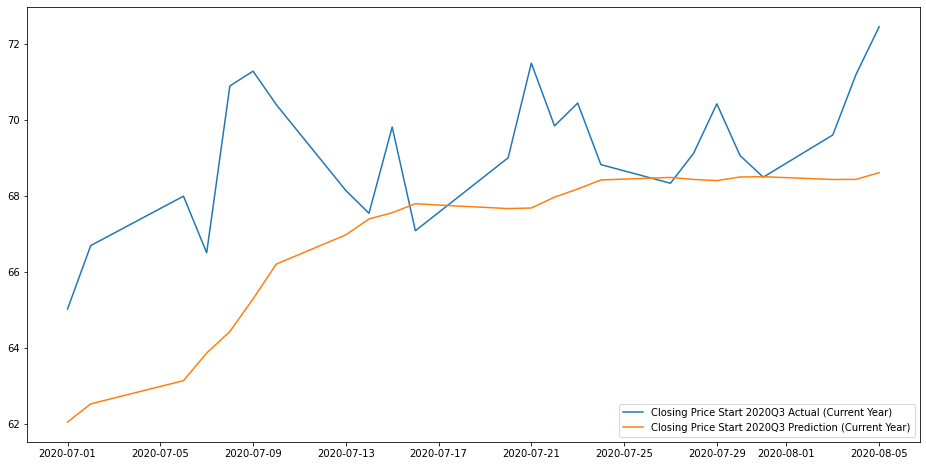

In [ ]:
plt.figure(figsize=(16,8))


line2 = plt.plot(valid[['Close']],label='Closing Price Start 2020Q3 Actual (Current Year)')
line3 = plt.plot(valid['Predictions'],label='Closing Price Start 2020Q3 Prediction (Current Year)')

plt.legend( loc='lower right')

plt.show()

##Predictions

In [ ]:
#Where is the highest closing price in the predicted zone
valid[['Predictions']].max()

Predictions    68.609314
dtype: float32

In [ ]:
#date of highest prediction
valid[['Predictions']].idxmax()

Predictions   2020-08-05
dtype: datetime64[ns]

In [ ]:
#valid.tail()

In [ ]:
#########
valid.to_csv('/content/drive/My Drive/AI/Datasets/Stock_Project/Predictions/prediction_TCEHY.csv')

In [ ]:
#date +/- week 
#valid_sub = valid.loc['2020-07-27':'2020-08-05']
#valid_sub

In [ ]:
print(valid.loc['2020-07-01'])

Close           65.02
Predictions    62.046
Name: 2020-07-01 00:00:00, dtype: object


In [ ]:
print(valid[valid.index=='2020-07-01'])

            Close  Predictions
Date                          
2020-07-01  65.02    62.046036


In [ ]:
print(valid[valid.Predictions == valid.Predictions.max()]) 

            Close  Predictions
Date                          
2020-08-05  72.45    68.609314


In [ ]:
res = valid[['Predictions']]
res.columns = ['Value']
res = res.sort_values(by='Value', ascending=False)
res = res[:1]

res2 = train
res2.columns = ['Value']
res2 = res2[-1:]

#res.head()
#res2.head()
result = res2.append(res)
result

,Value
Date,
2020-06-30,64
2020-08-05,68.6093


In [ ]:
selldate = str(valid[['Predictions']].idxmax()[0])

In [ ]:
###############
plres9 = valid[['Predictions']]
plres9 = plres9.loc[:selldate]
plres9.columns =  ['TCEHY']
plres9.tail()

,TCEHY
Date,
2020-07-30,68.494606
2020-07-31,68.501930
2020-08-03,68.428467
2020-08-04,68.431725
2020-08-05,68.609314


In [ ]:
bvalue = result['Value'][0]

In [ ]:
#############
roil = []
for index, row in plres9.iterrows():
     roil.append( ((row['TCEHY']-	bvalue)/bvalue)*100)



In [ ]:
plres9['TCEHY_ROI (%)'] = roil

In [ ]:
plres9.tail()

,TCEHY,TCEHY_ROI (%)
Date,,
2020-07-30,68.494606,7.022822
2020-07-31,68.501930,7.034266
2020-08-03,68.428467,6.919479
2020-08-04,68.431725,6.924570
2020-08-05,68.609314,7.202053


In [ ]:
plres9.to_csv('/content/drive/My Drive/AI/Datasets/Stock_Project/Predictions/sell_TCEHY.csv')

##End Valuation

In [ ]:
#######
orig.loc[9]

Investment     Tencent Holdings
Shares/Par            4,989,500
Value ($)           319,716,747
% of Top 10               6.82%
Name: 9, dtype: object

In [ ]:
bdate = str(result.index[0]) 
bdate = bdate.split(' ')
bdate = bdate[0]
bdate

'2020-06-30'

In [ ]:
sdate = str(result.index[1]) 
sdate = sdate.split(' ')
sdate = sdate[0]
sdate

'2020-08-05'

In [ ]:
ahigh = valid[['Close']]
ahigh = ahigh.sort_values(by='Close', ascending=False)
ahigh = ahigh[:1]
#ahigh

evalue = ahigh['Close'][0]
pp = round(evalue-bvalue,2)
ro = pp/bvalue
rop = ro*100
rop = round(rop,2)
rop

13.2

In [ ]:

bsvalue = round(result.Value[0],2)

esvalue = round(result.Value[1],2)
pps = round(esvalue-bsvalue,2)
roi = pps/bsvalue
roip = roi*100
roip =round(roip,2)



print('Begin Date: '+str(bdate))
print('Begin Value/Share: '+str(bsvalue))
print('Sell Date: '+str(sdate))
print('Sell Value/Share: '+str(esvalue))
print('Profit per Share: '+str(pps))
print('Return on Investment: '+str(roip)+'%')
print('\n')

###############
shares = locale.atoi(orig.loc[9]['Shares/Par'])
bvalue = locale.atoi(orig.loc[9]['Value ($)'])
svalue = round(shares * esvalue,2)
profit = round(svalue - bvalue,2)
print('Shares: '+str(shares))
print('Begin Value: '+str(bvalue))
print('Sell Value: '+str(svalue))
print('Total Profit: '+str(profit))
print('\n')

print('Actual Max Return on Investment: '+str(rop)+'%')


Begin Date: 2020-06-30
Begin Value/Share: 64.0
Sell Date: 2020-08-05
Sell Value/Share: 68.61
Profit per Share: 4.61
Return on Investment: 7.2%


Shares: 4989500
Begin Value: 319716747
Sell Value: 342329595.0
Total Profit: 22612848.0


Actual Max Return on Investment: 13.2%


##Update Final Table

In [ ]:
##########
final['Shares'].loc[9] = shares
final['Begin Date'].loc[9] = bdate
final['Begin Share Value'].loc[9] = bsvalue
final['Sell Date'].loc[9] = sdate
final['Sell Share Value'].loc[9] = esvalue
final['Profit Per Share'].loc[9] = pps
final['Begin Value'].loc[9] = bvalue
final['Sell Value'].loc[9] = svalue
final['Total Profit'].loc[9] = profit
final['ROI (%)'].loc[9] = roip
final['Actual Max ROI (%)'].loc[9] = rop

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
final

,Investment,Shares,Begin Date,Begin Share Value,Sell Date,Sell Share Value,Profit Per Share,Begin Value,Sell Value,Total Profit,ROI (%),Actual Max ROI (%)
0,Amazon,411600.0,2020-06-30,2758.82,2020-07-16,3072.70,313.88,1.135530e+09,1.264723e+09,1.291930e+08,11.38,16.17
1,Facebook,2132800.0,2020-06-30,227.07,2020-08-05,247.52,20.45,4.842949e+08,5.279107e+08,4.361576e+07,9.01,11.71
2,"American Tower, REIT",1840700.0,2020-06-30,258.54,2020-07-13,263.69,5.15,4.758946e+08,4.853742e+08,9.479605e+06,1.99,4.93
3,"Alibaba Group Holding, ADR",2021134.0,2020-06-30,215.70,2020-08-05,247.96,32.26,4.359586e+08,5.011604e+08,6.520178e+07,14.96,22.81
4,Netflix,886480.0,2020-06-30,455.04,2020-07-17,513.53,58.49,4.033839e+08,4.552341e+08,5.185022e+07,12.85,20.59
5,"Crown Castle International, REIT",2364468.0,2020-06-30,167.35,2020-07-13,171.53,4.18,3.956937e+08,4.055772e+08,9.883476e+06,2.50,4.15
6,T-Mobile US,3684370.0,2020-06-30,104.15,2020-07-01,109.23,5.08,3.837271e+08,4.024437e+08,1.871660e+07,4.88,4.07
7,PayPal Holdings,1900400.0,2020-06-30,174.23,2020-08-05,208.75,34.52,3.311067e+08,3.967085e+08,6.560181e+07,19.81,16.46
8,Alphabet Class C,227703.0,2020-06-30,1413.61,2020-07-24,1510.44,96.83,3.218832e+08,3.439317e+08,2.204848e+07,6.85,10.96
9,Tencent Holdings,4989500.0,2020-06-30,64.00,2020-08-05,68.61,4.61,3.197167e+08,3.423296e+08,2.261285e+07,7.20,13.20


#Export Final

In [ ]:
tbv = final['Begin Value'].sum(axis = 0, skipna = True) 
tsv = final['Sell Value'].sum(axis = 0, skipna = True) 
tbv = round(tbv,2)
tsv = round(tsv,2)
print(tbv)
print(tsv)

4687189782.0
5125393365.5


In [ ]:
profitp = round(tsv-tbv,2)
roiop = round((profitp / tbv)*100,2)

In [ ]:
tbvl = [tbv]
tsvl = [tsv]
profitpl = [profitp]
roiopl = [roiop]
fdat = {'Total Beginning Cash': tbvl, 
        'Total Ending Cash': tsvl,
        'Total Profit of Portfolio': profitpl,
        'Total Return on Investment of Portfolio': roiopl} 
  
# Convert the dictionary into DataFrame 
dfdat = pd.DataFrame(fdat) 



In [ ]:
dfdat

,Total Beginning Cash,Total Ending Cash,Total Profit of Portfolio,Total Return on Investment of Portfolio
0,4.687190e+09,5.125393e+09,438203583.5,9.35


In [ ]:
Titles = ['Total Beginning Cash','Total Ending Cash']
Values = [tbv,tsv]
fdat2 = {'Titles': Titles,
         'Values': Values}

# Convert the dictionary into DataFrame 
dfdat2 = pd.DataFrame(fdat2) 

#Export
dfdat2.to_csv('/content/drive/My Drive/AI/Datasets/Stock_Project/Predictions/Final_profit.csv')

In [ ]:
dfdat2

,Titles,Values
0,Total Beginning Cash,4.687190e+09
1,Total Ending Cash,5.125393e+09


In [ ]:
final['Begin Portfolio Percent (%)'] = np.nan
final['End Portfolio Percent (%)'] = np.nan

In [ ]:
for i in range(len(final)):
  final['Begin Portfolio Percent (%)'].loc[i] = (final['Begin Value'].loc[i]/tbv)*100
  final['End Portfolio Percent (%)'].loc[i] = (final['Sell Value'].loc[i]/tsv)*100

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
final

,Investment,Shares,Begin Date,Begin Share Value,Sell Date,Sell Share Value,Profit Per Share,Begin Value,Sell Value,Total Profit,ROI (%),Actual Max ROI (%),Begin Portfolio Percent (%),End Portfolio Percent (%)
0,Amazon,411600.0,2020-06-30,2758.82,2020-07-16,3072.70,313.88,1.135530e+09,1.264723e+09,1.291930e+08,11.38,16.17,24.226250,24.675634
1,Facebook,2132800.0,2020-06-30,227.07,2020-08-05,247.52,20.45,4.842949e+08,5.279107e+08,4.361576e+07,9.01,11.71,10.332308,10.299905
2,"American Tower, REIT",1840700.0,2020-06-30,258.54,2020-07-13,263.69,5.15,4.758946e+08,4.853742e+08,9.479605e+06,1.99,4.93,10.153090,9.469989
3,"Alibaba Group Holding, ADR",2021134.0,2020-06-30,215.70,2020-08-05,247.96,32.26,4.359586e+08,5.011604e+08,6.520178e+07,14.96,22.81,9.301066,9.777989
4,Netflix,886480.0,2020-06-30,455.04,2020-07-17,513.53,58.49,4.033839e+08,4.552341e+08,5.185022e+07,12.85,20.59,8.606092,8.881934
5,"Crown Castle International, REIT",2364468.0,2020-06-30,167.35,2020-07-13,171.53,4.18,3.956937e+08,4.055772e+08,9.883476e+06,2.50,4.15,8.442025,7.913094
6,T-Mobile US,3684370.0,2020-06-30,104.15,2020-07-01,109.23,5.08,3.837271e+08,4.024437e+08,1.871660e+07,4.88,4.07,8.186721,7.851958
7,PayPal Holdings,1900400.0,2020-06-30,174.23,2020-08-05,208.75,34.52,3.311067e+08,3.967085e+08,6.560181e+07,19.81,16.46,7.064077,7.740060
8,Alphabet Class C,227703.0,2020-06-30,1413.61,2020-07-24,1510.44,96.83,3.218832e+08,3.439317e+08,2.204848e+07,6.85,10.96,6.867297,6.710348
9,Tencent Holdings,4989500.0,2020-06-30,64.00,2020-08-05,68.61,4.61,3.197167e+08,3.423296e+08,2.261285e+07,7.20,13.20,6.821075,6.679089


In [ ]:
final.to_csv('/content/drive/My Drive/AI/Datasets/Stock_Project/Predictions/final.csv')

In [ ]:

print('Total Beginning Cash: '+str(tbv))
print('Total Ending Cash: '+str(tsv))
print('Total Profit of Portfolio: '+str(profitp))
print('Total Return on Investment of Portfolio: '+str(roiop)+'%')

Total Beginning Cash: 4687189782.0
Total Ending Cash: 5125393365.5
Total Profit of Portfolio: 438203583.5
Total Return on Investment of Portfolio: 9.35%


##Combine Sell Dataframes

In [ ]:
frames = [plres0,plres1,plres2,plres3,plres4,plres5,plres6,plres7,plres8,plres9]
plresult = pd.concat(frames,axis=1,join='outer')

In [ ]:
plresult.head()

,AMZN,AMZN_ROI (%),FB,FB_ROI (%),AMT,AMT_ROI (%),BABA,BABA_ROI (%),NFLX,NFLX_ROI (%),CCI,CCI_ROI (%),TMUS,TMUS_ROI (%),PYPL,PYPL_ROI (%),GOOG,GOOG_ROI (%),TCEHY,TCEHY_ROI (%)
Date,,,,,,,,,,,,,,,,,,,,
2020-07-01,2703.578125,-2.002376,230.856979,1.667755,255.756256,-1.076720,219.326828,1.681424,455.317078,0.060889,164.254303,-1.849837,109.226028,4.873765,189.104248,8.537136,1396.358643,-1.220375,62.046036,-3.053069
2020-07-02,2722.620850,-1.312127,231.239609,1.836263,256.720337,-0.703826,218.276855,1.194649,458.699707,0.804259,165.432907,-1.145562,NaN,NaN,190.557083,9.370997,1395.450684,-1.284605,62.524387,-2.305645
2020-07-06,2748.015137,-0.391650,232.165863,2.244178,258.045013,-0.191458,218.129944,1.126540,462.143982,1.561175,166.747025,-0.360312,NaN,NaN,192.042236,10.223406,1400.251831,-0.944967,63.134750,-1.351953
2020-07-07,2792.524658,1.221703,234.637573,3.332702,259.633759,0.423048,220.054810,2.018921,467.380981,2.712063,168.499130,0.686659,NaN,NaN,193.311279,10.951779,1411.116943,-0.176360,63.861694,-0.216103
2020-07-08,2836.713623,2.823437,237.538269,4.610147,261.138245,1.004965,222.431824,3.120921,472.577911,3.854145,169.777908,1.450793,NaN,NaN,194.464233,11.613521,1422.637939,0.638645,64.427620,0.668156


In [ ]:
plresult.tail()

,AMZN,AMZN_ROI (%),FB,FB_ROI (%),AMT,AMT_ROI (%),BABA,BABA_ROI (%),NFLX,NFLX_ROI (%),CCI,CCI_ROI (%),TMUS,TMUS_ROI (%),PYPL,PYPL_ROI (%),GOOG,GOOG_ROI (%),TCEHY,TCEHY_ROI (%)
Date,,,,,,,,,,,,,,,,,,,,
2020-07-30,NaN,NaN,235.523590,3.722897,NaN,NaN,246.037720,14.064777,NaN,NaN,NaN,NaN,NaN,NaN,195.022568,11.933979,NaN,NaN,68.494606,7.022822
2020-07-31,NaN,NaN,235.251404,3.603028,NaN,NaN,246.075424,14.082257,NaN,NaN,NaN,NaN,NaN,NaN,197.504700,13.358609,NaN,NaN,68.501930,7.034266
2020-08-03,NaN,NaN,238.980042,5.245094,NaN,NaN,246.028778,14.060631,NaN,NaN,NaN,NaN,NaN,NaN,200.967163,15.345904,NaN,NaN,68.428467,6.919479
2020-08-04,NaN,NaN,243.531326,7.249447,NaN,NaN,246.667282,14.356646,NaN,NaN,NaN,NaN,NaN,NaN,204.863968,17.582490,NaN,NaN,68.431725,6.924570
2020-08-05,NaN,NaN,247.520889,9.006422,NaN,NaN,247.957214,14.954668,NaN,NaN,NaN,NaN,NaN,NaN,208.745407,19.810258,NaN,NaN,68.609314,7.202053


In [ ]:
plresult.to_csv('/content/drive/My Drive/AI/Datasets/Stock_Project/Predictions/sell_final.csv')

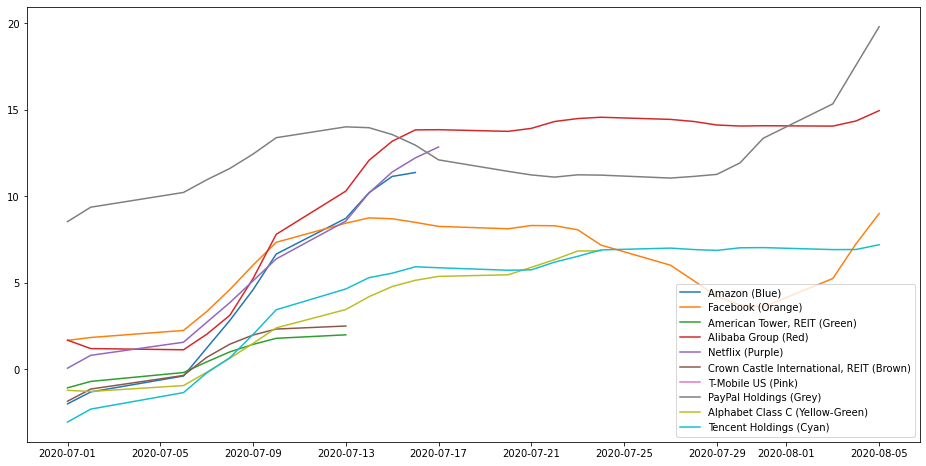

In [ ]:
plt.figure(figsize=(16,8))

line0 = plt.plot(plresult['AMZN_ROI (%)'],label='Amazon (Blue)')
line1 = plt.plot(plresult['FB_ROI (%)'],label='Facebook (Orange)')
line2 = plt.plot(plresult['AMT_ROI (%)'],label='American Tower, REIT (Green)')
line3 = plt.plot(plresult['BABA_ROI (%)'],label='Alibaba Group (Red)')
line4 = plt.plot(plresult['NFLX_ROI (%)'],label='Netflix (Purple)')
line5 = plt.plot(plresult['CCI_ROI (%)'],label='Crown Castle International, REIT (Brown)')
line6 = plt.plot(plresult['TMUS_ROI (%)'],label='T-Mobile US (Pink)')
line7 = plt.plot(plresult['PYPL_ROI (%)'],label='PayPal Holdings (Grey)')
line8 = plt.plot(plresult['GOOG_ROI (%)'],label='Alphabet Class C (Yellow-Green)')
line9 = plt.plot(plresult['TCEHY_ROI (%)'],label='Tencent Holdings (Cyan)')

plt.legend( loc='lower right')

plt.show()